In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from datetime import datetime
import pandas_datareader
from pandas_datareader import data
import matplotlib.pyplot as plot
import os
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import concat
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pandas import DataFrame

In [3]:
gold_prices = pd.read_csv('gold_prices_monthly.csv')
gold_prices

,date,price
0,1/1/1950,34.730
1,2/1/1950,34.730
2,3/1/1950,34.730
3,4/1/1950,34.730
4,5/1/1950,34.730
...,...,...
813,10/1/2017,1280.677
814,11/1/2017,1283.189
815,12/1/2017,1265.674
816,1/1/2018,1332.809


In [4]:
gold_prices.drop(gold_prices.tail(2).index, inplace=True)

In [5]:
gold_prices['date'] = pd.to_datetime(gold_prices['date'])
gold_prices

,date,price
0,1950-01-01,34.730
1,1950-02-01,34.730
2,1950-03-01,34.730
3,1950-04-01,34.730
4,1950-05-01,34.730
...,...,...
811,2017-08-01,1281.720
812,2017-09-01,1317.045
813,2017-10-01,1280.677
814,2017-11-01,1283.189


In [6]:
gold_prices.set_index('date', inplace = True)
gold_prices.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


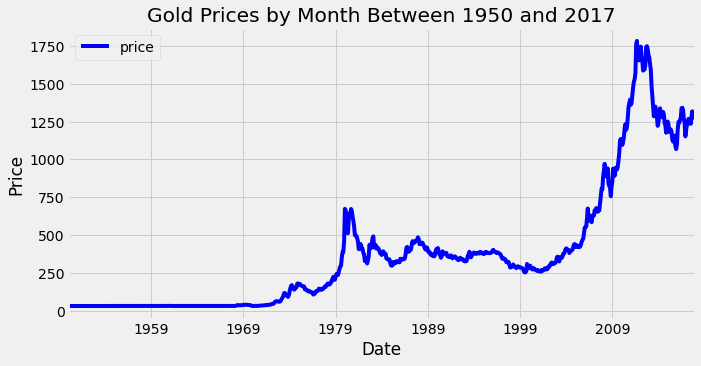

In [7]:
plot.style.use('fivethirtyeight')
ax = gold_prices.plot(title='Gold Prices by Month Between 1950 and 2017', figsize=(10,5), color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plot.show()

In [8]:
price_changes = gold_prices.pct_change()
price_changes.head()

,price
date,
1950-01-01,NaN
1950-02-01,0.0
1950-03-01,0.0
1950-04-01,0.0
1950-05-01,0.0


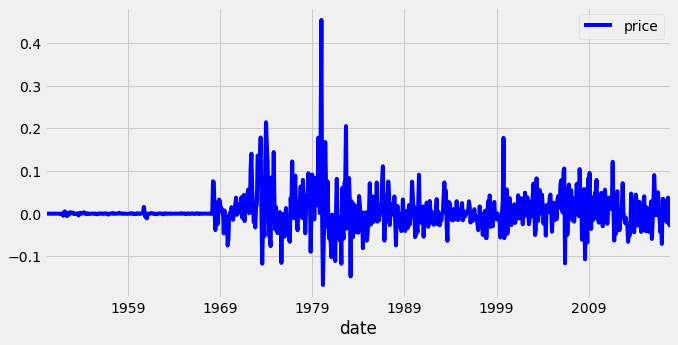

In [9]:
plot.style.use('tableau-colorblind10')
gold_prices.pct_change().plot(figsize=(10,5), color = 'blue');

In [10]:
gold_prices[gold_prices["price"] == gold_prices['price'].max()]

,price
date,
2011-09-01,1780.648


In [11]:
gold_prices[gold_prices["price"] == gold_prices['price'].min()]

,price
date,
1952-01-01,34.49
1952-02-01,34.49


In [12]:
ts1 = gold_prices['price']
ts1

date
1950-01-01      34.730
1950-02-01      34.730
1950-03-01      34.730
1950-04-01      34.730
1950-05-01      34.730
                ...   
2017-08-01    1281.720
2017-09-01    1317.045
2017-10-01    1280.677
2017-11-01    1283.189
2017-12-01    1265.674
Name: price, Length: 816, dtype: float64

In [13]:
result = seasonal_decompose(ts1, model='additive', period=12)

In [14]:
print(result.trend)

date
1950-01-01   NaN
1950-02-01   NaN
1950-03-01   NaN
1950-04-01   NaN
1950-05-01   NaN
              ..
2017-08-01   NaN
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
2017-12-01   NaN
Name: trend, Length: 816, dtype: float64


In [15]:
print(result.seasonal)

date
1950-01-01    2.943538
1950-02-01    6.163981
1950-03-01    1.914269
1950-04-01   -0.670287
1950-05-01   -1.943490
                ...   
2017-08-01   -2.208692
2017-09-01    2.647974
2017-10-01    2.110242
2017-11-01   -0.249746
2017-12-01   -2.294200
Name: seasonal, Length: 816, dtype: float64


In [16]:
print(result.resid)

date
1950-01-01   NaN
1950-02-01   NaN
1950-03-01   NaN
1950-04-01   NaN
1950-05-01   NaN
              ..
2017-08-01   NaN
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
2017-12-01   NaN
Name: resid, Length: 816, dtype: float64


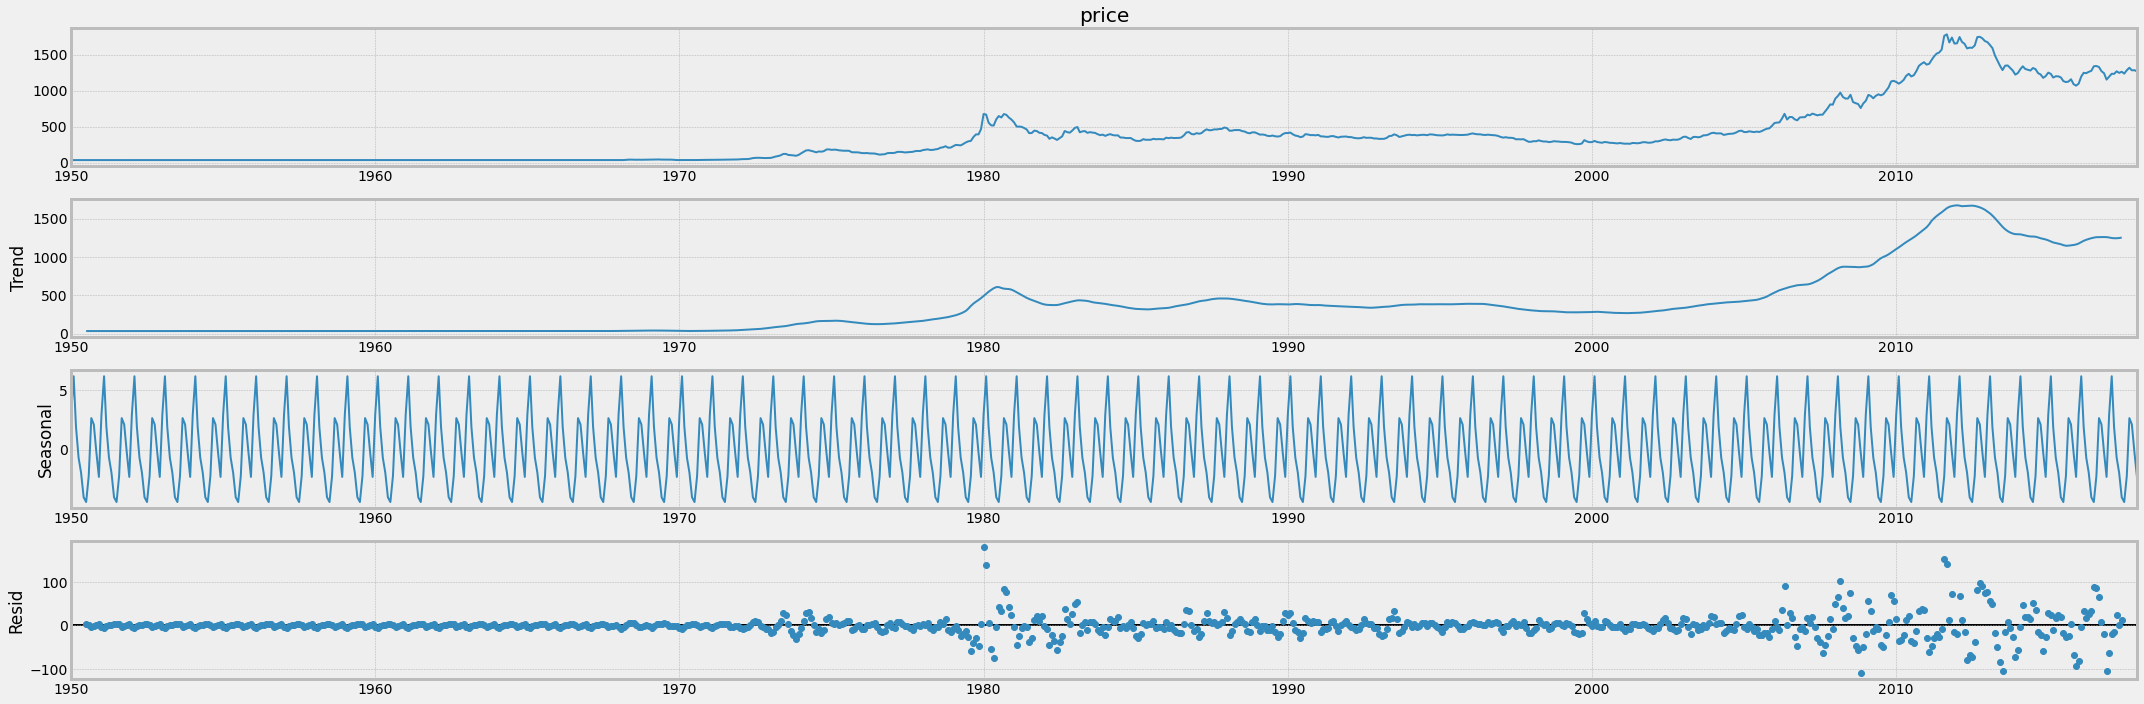

In [17]:
rcParams['figure.figsize'] = 30, 10
plot.style.use('bmh')

ts1 = gold_prices['price']

result1 = seasonal_decompose(ts1, model='additive', period=12)
result1.plot()
plot.show()

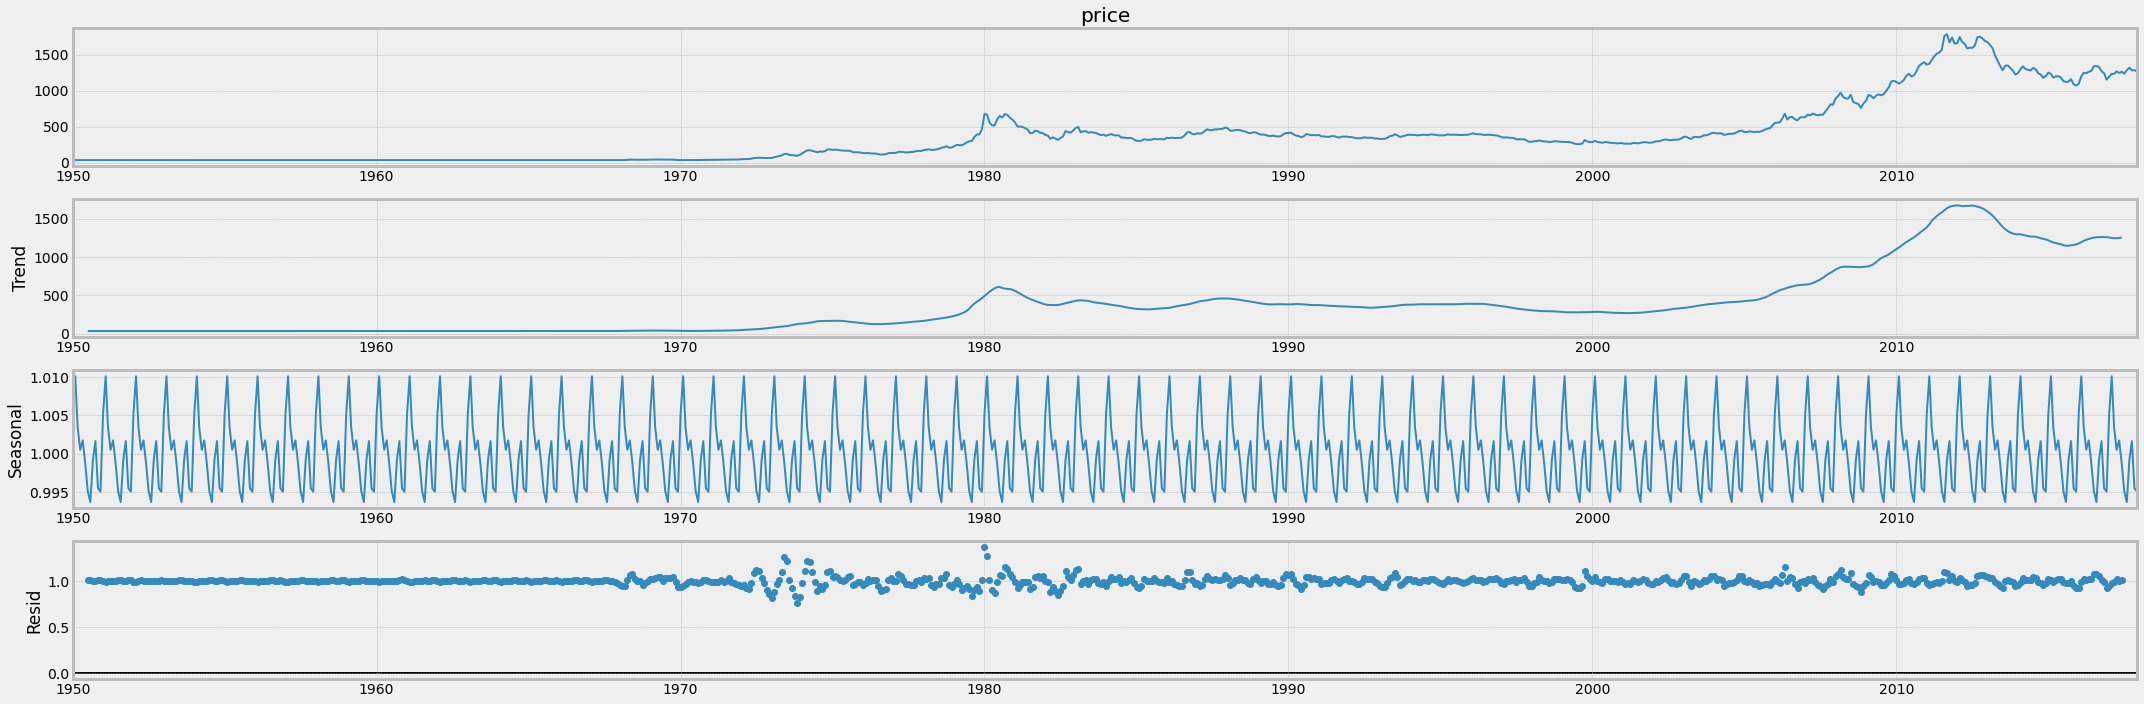

In [18]:
rcParams['figure.figsize'] = 30, 10
plot.style.use('bmh')

ts2 = gold_prices['price']

result2 = seasonal_decompose(ts2, model='multiplicative', period=12)
result2.plot()
plot.show()

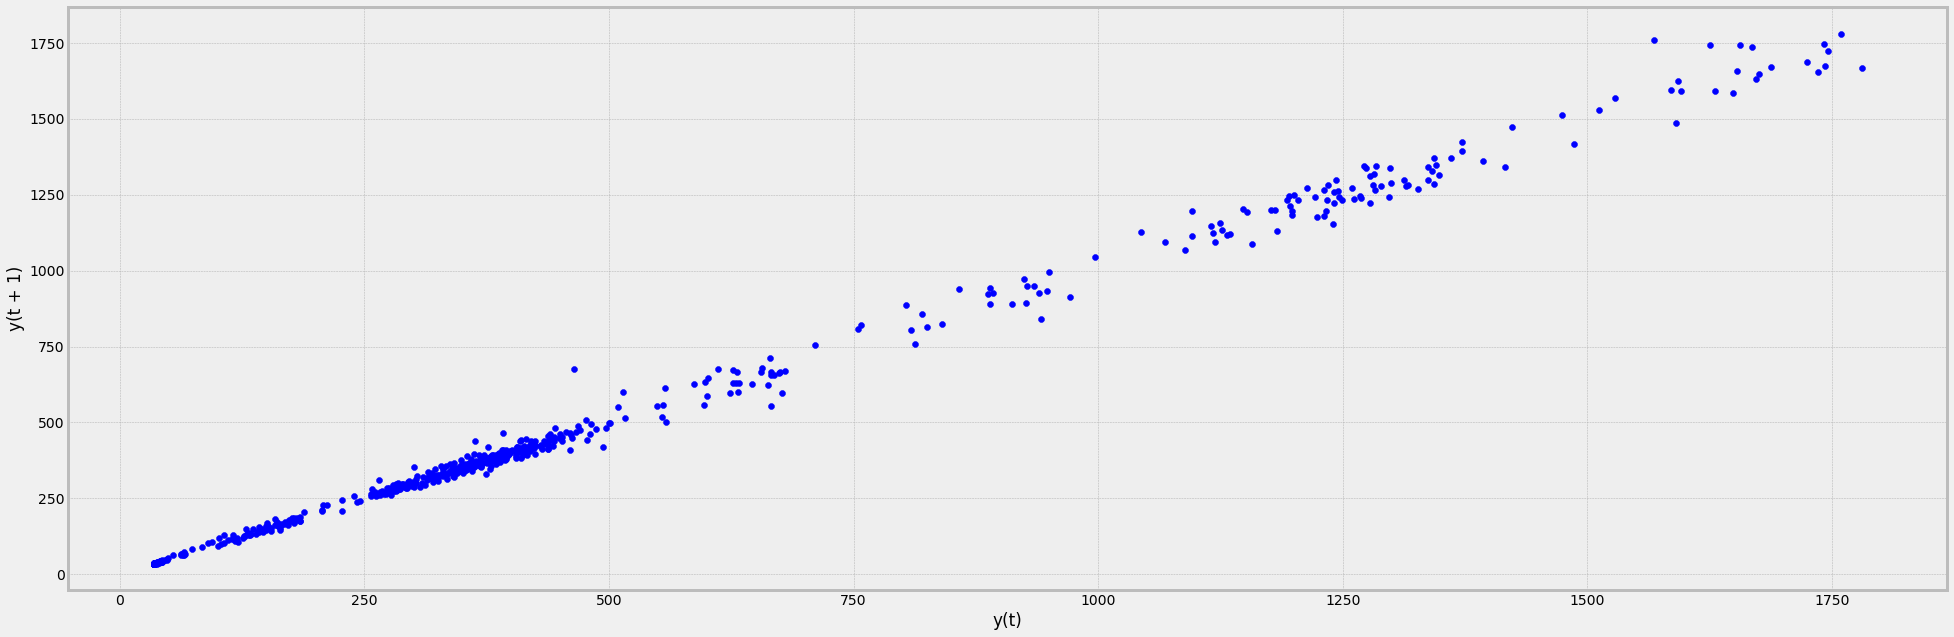

In [19]:
lag_plot(gold_prices)
plot.show()

In [20]:
autocorrelation = gold_prices['price'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 1.00


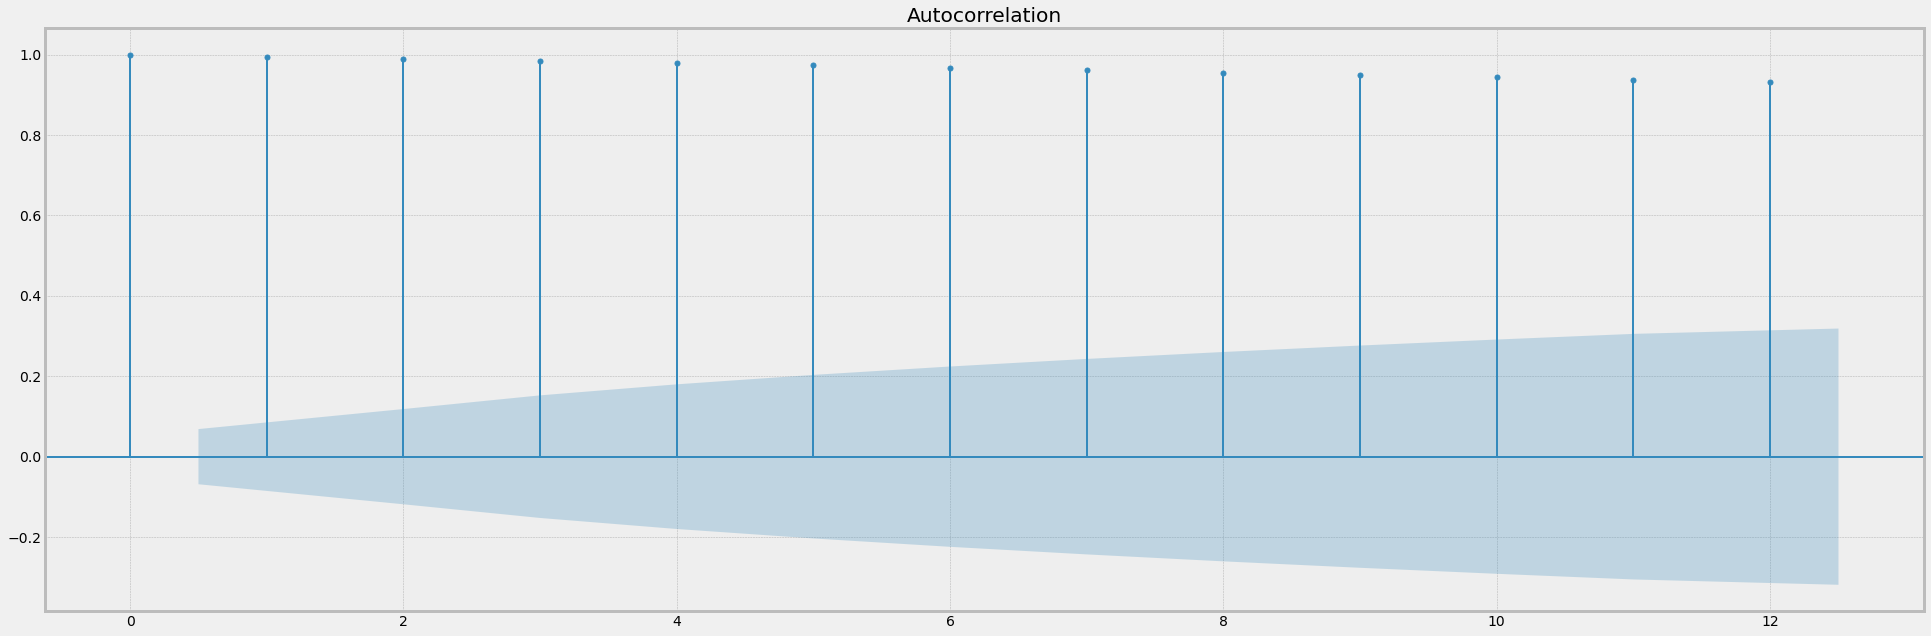

In [21]:
plot_acf(gold_prices['price'], lags=12);

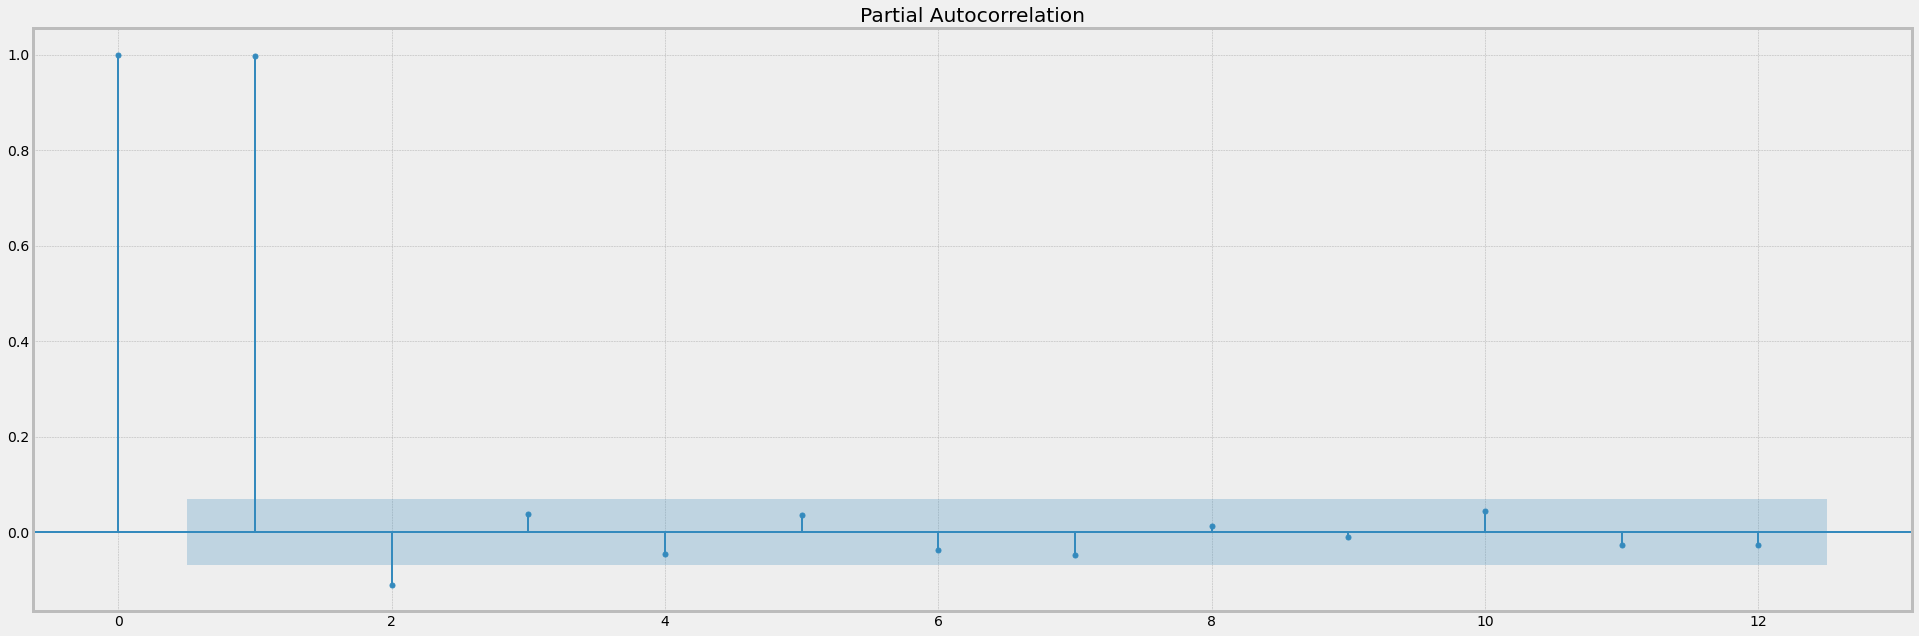

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(gold_prices['price'], lags=12);

In [23]:
rolmean = gold_prices.price.rolling(window=12).mean()
rolstd = gold_prices.price.rolling(window=12).std()

In [24]:
rolmean

date
1950-01-01            NaN
1950-02-01            NaN
1950-03-01            NaN
1950-04-01            NaN
1950-05-01            NaN
                 ...     
2017-08-01    1244.633583
2017-09-01    1243.835833
2017-10-01    1244.814833
2017-11-01    1248.389500
2017-12-01    1257.848583
Name: price, Length: 816, dtype: float64

In [25]:
rolstd

date
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
1950-05-01          NaN
                ...    
2017-08-01    43.843456
2017-09-01    42.275145
2017-10-01    43.038218
2017-11-01    44.388738
2017-12-01    32.529524
Name: price, Length: 816, dtype: float64

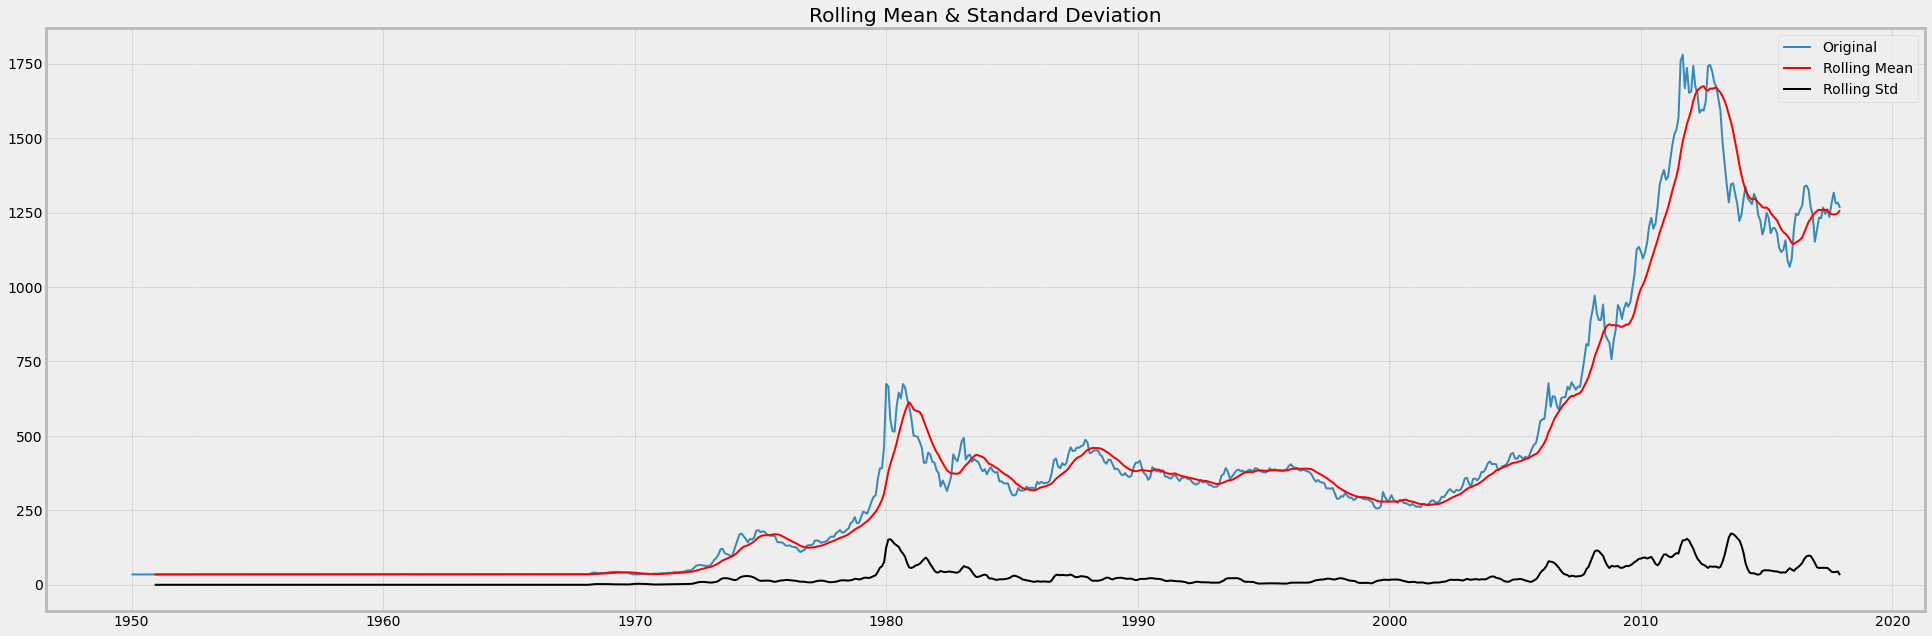

In [26]:
orig = plot.plot(gold_prices.price, label='Original')
mean = plot.plot(rolmean, color='red', label='Rolling Mean')
std = plot.plot(rolstd, color='black', label='Rolling Std')
plot.legend(loc='best')
plot.title('Rolling Mean & Standard Deviation')
plot.show(block=False)

In [27]:
gold_prices['first_diff'] = gold_prices['price'].diff()
gold_prices.head(20)

,price,first_diff
date,,
1950-01-01,34.73,NaN
1950-02-01,34.73,0.00
1950-03-01,34.73,0.00
1950-04-01,34.73,0.00
1950-05-01,34.73,0.00
1950-06-01,34.73,0.00
1950-07-01,34.73,0.00
1950-08-01,34.73,0.00
1950-09-01,34.73,0.00


In [28]:
gold_prices.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

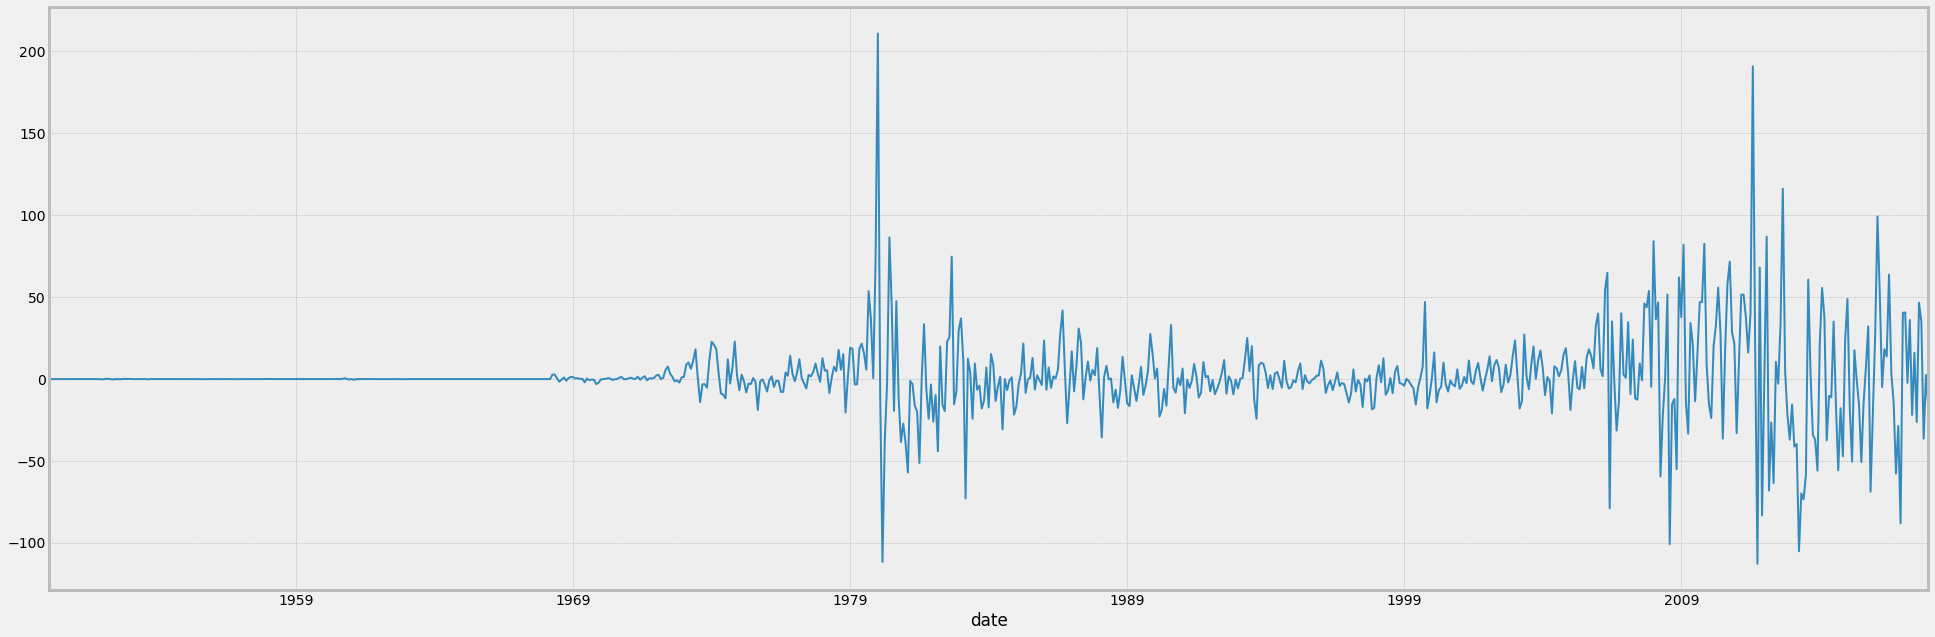

In [29]:
gold_prices['first_diff'].plot()

In [30]:
gold_prices['second_diff'] = gold_prices['price'].diff(2)
gold_prices.head(20)

,price,first_diff,second_diff
date,,,
1950-02-01,34.73,0.00,NaN
1950-03-01,34.73,0.00,NaN
1950-04-01,34.73,0.00,0.00
1950-05-01,34.73,0.00,0.00
1950-06-01,34.73,0.00,0.00
1950-07-01,34.73,0.00,0.00
1950-08-01,34.73,0.00,0.00
1950-09-01,34.73,0.00,0.00
1950-10-01,34.73,0.00,0.00


In [31]:
gold_prices.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

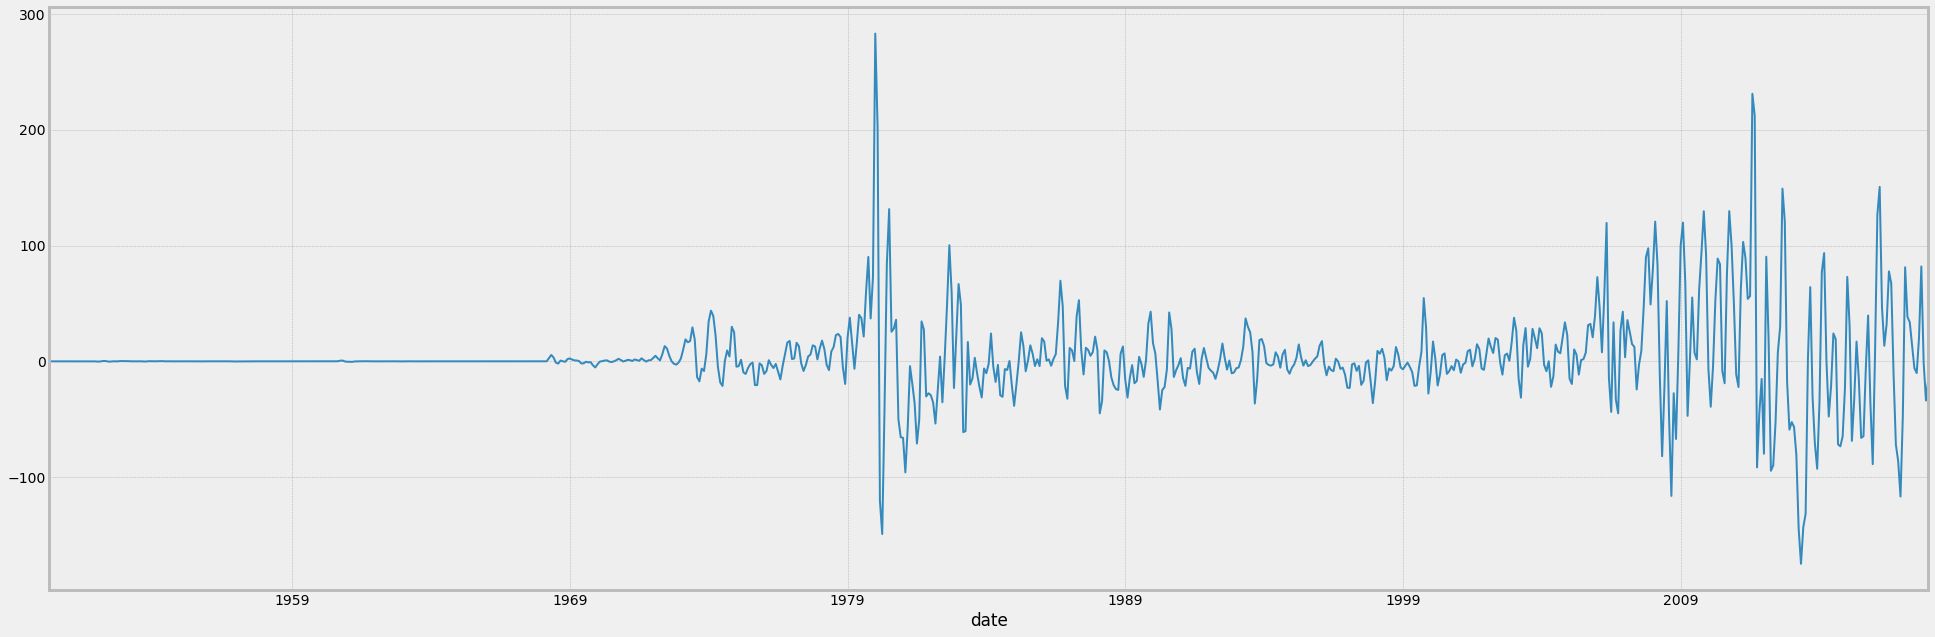

In [32]:
gold_prices['second_diff'].plot()

In [33]:
fpa_mean = gold_prices['price'].mean()
fpa_mean

380.1309138991392

In [34]:
gold_prices['gold_prices_diffmean'] = gold_prices['price'] - fpa_mean
gold_prices.tail()

,price,first_diff,second_diff,gold_prices_diffmean
date,,,,
2017-08-01,1281.720,46.620,20.443,901.589086
2017-09-01,1317.045,35.325,81.945,936.914086
2017-10-01,1280.677,-36.368,-1.043,900.546086
2017-11-01,1283.189,2.512,-33.856,903.058086
2017-12-01,1265.674,-17.515,-15.003,885.543086


<AxesSubplot:xlabel='date'>

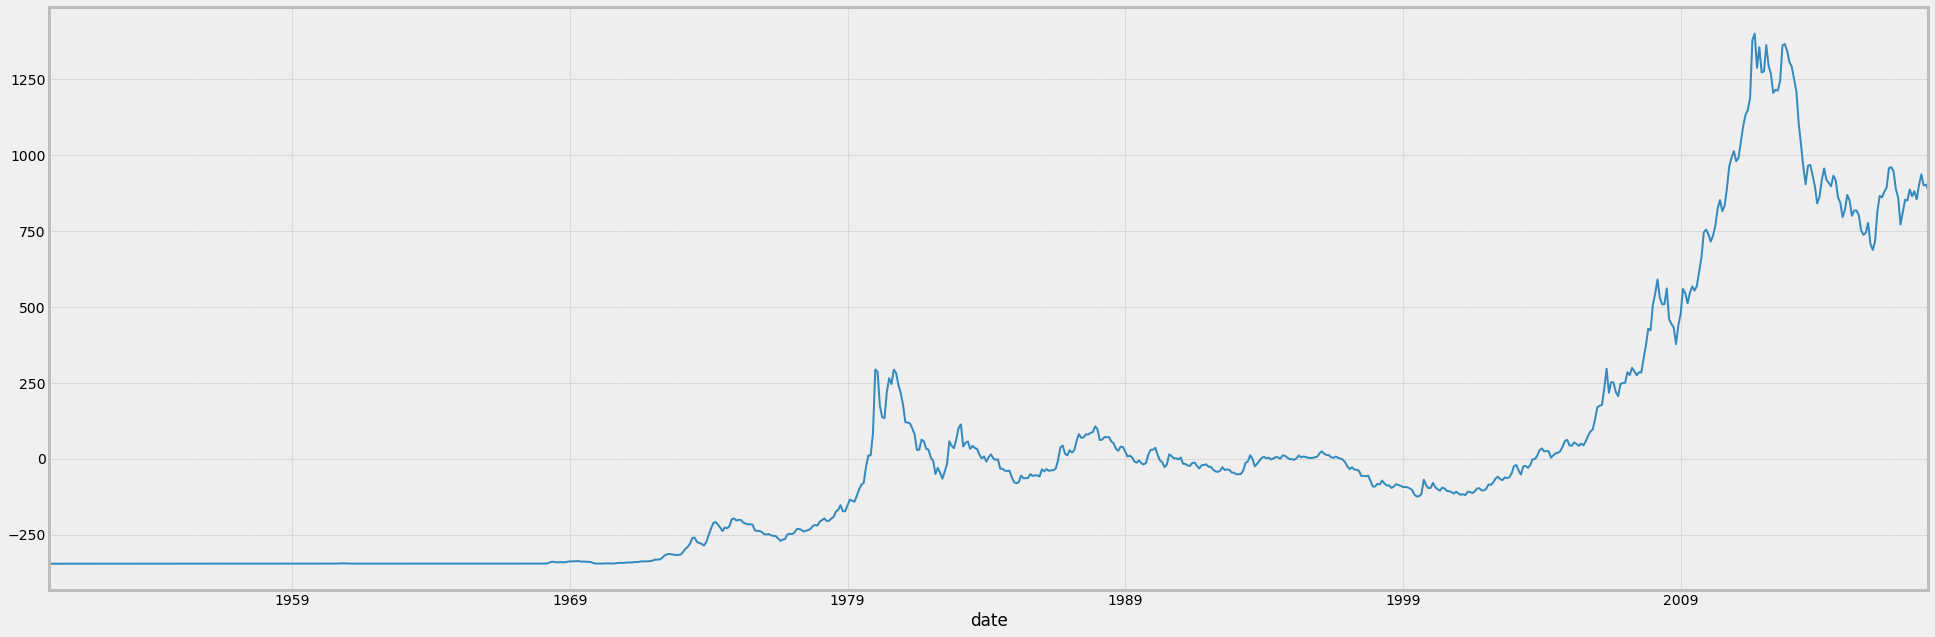

In [35]:
gold_prices['gold_prices_diffmean'].plot()

In [36]:
gold_prices['gold_pct_change'] = gold_prices['price'].pct_change()
gold_prices.dropna(inplace=True)
gold_prices.head()

,price,first_diff,second_diff,gold_prices_diffmean,gold_pct_change
date,,,,,
1950-05-01,34.73,0.0,0.0,-345.400914,0.0
1950-06-01,34.73,0.0,0.0,-345.400914,0.0
1950-07-01,34.73,0.0,0.0,-345.400914,0.0
1950-08-01,34.73,0.0,0.0,-345.400914,0.0
1950-09-01,34.73,0.0,0.0,-345.400914,0.0


<AxesSubplot:xlabel='date'>

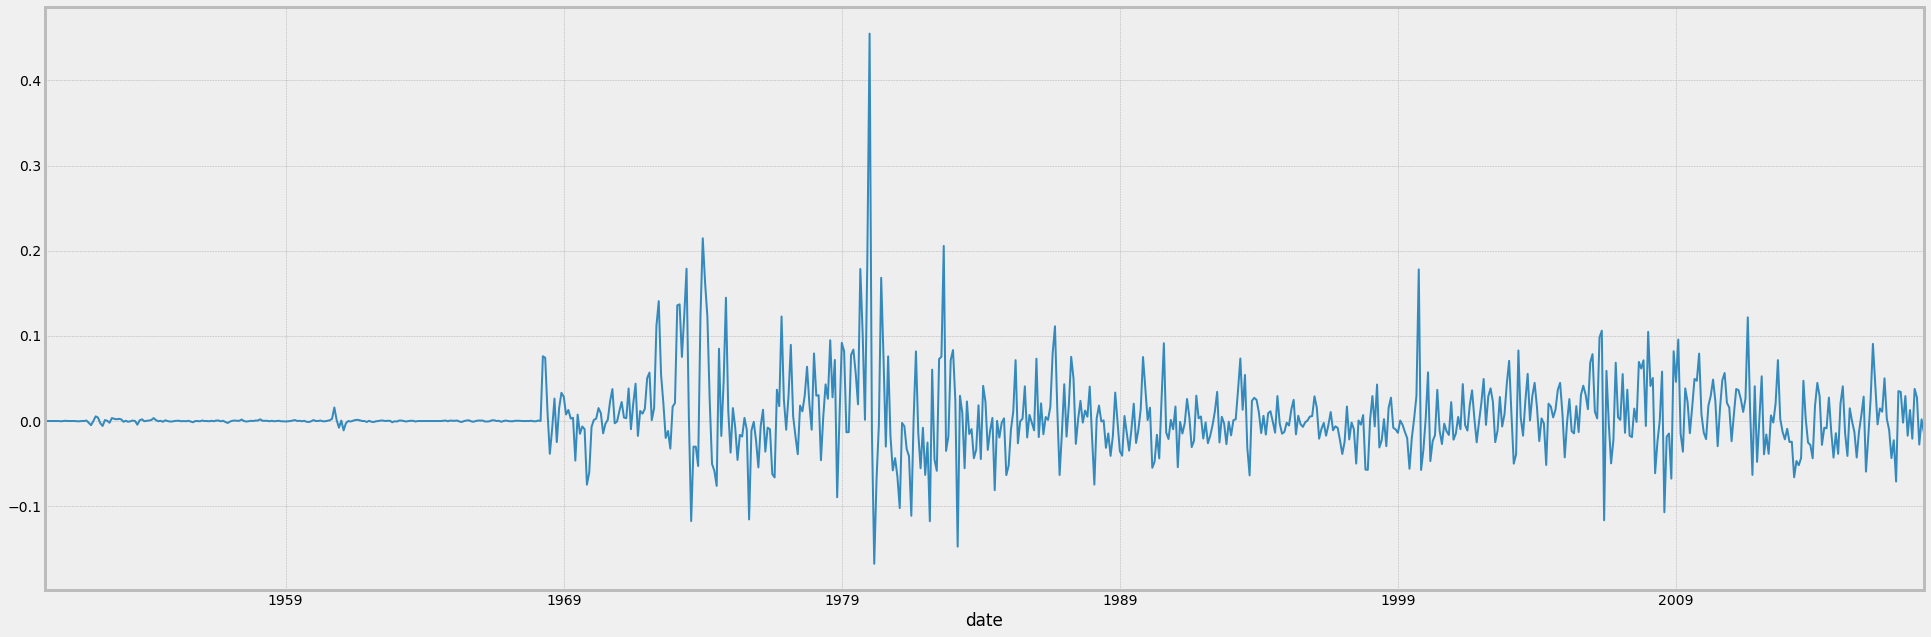

In [37]:
gold_prices['gold_pct_change'].plot()

In [38]:
gold_prices['gold_prices_log'] = np.log(gold_prices['price'])
gold_prices.tail()

,price,first_diff,second_diff,gold_prices_diffmean,gold_pct_change,gold_prices_log
date,,,,,,
2017-08-01,1281.720,46.620,20.443,901.589086,0.037746,7.155958
2017-09-01,1317.045,35.325,81.945,936.914086,0.027561,7.183146
2017-10-01,1280.677,-36.368,-1.043,900.546086,-0.027613,7.155144
2017-11-01,1283.189,2.512,-33.856,903.058086,0.001961,7.157104
2017-12-01,1265.674,-17.515,-15.003,885.543086,-0.013650,7.143360


<AxesSubplot:xlabel='date'>

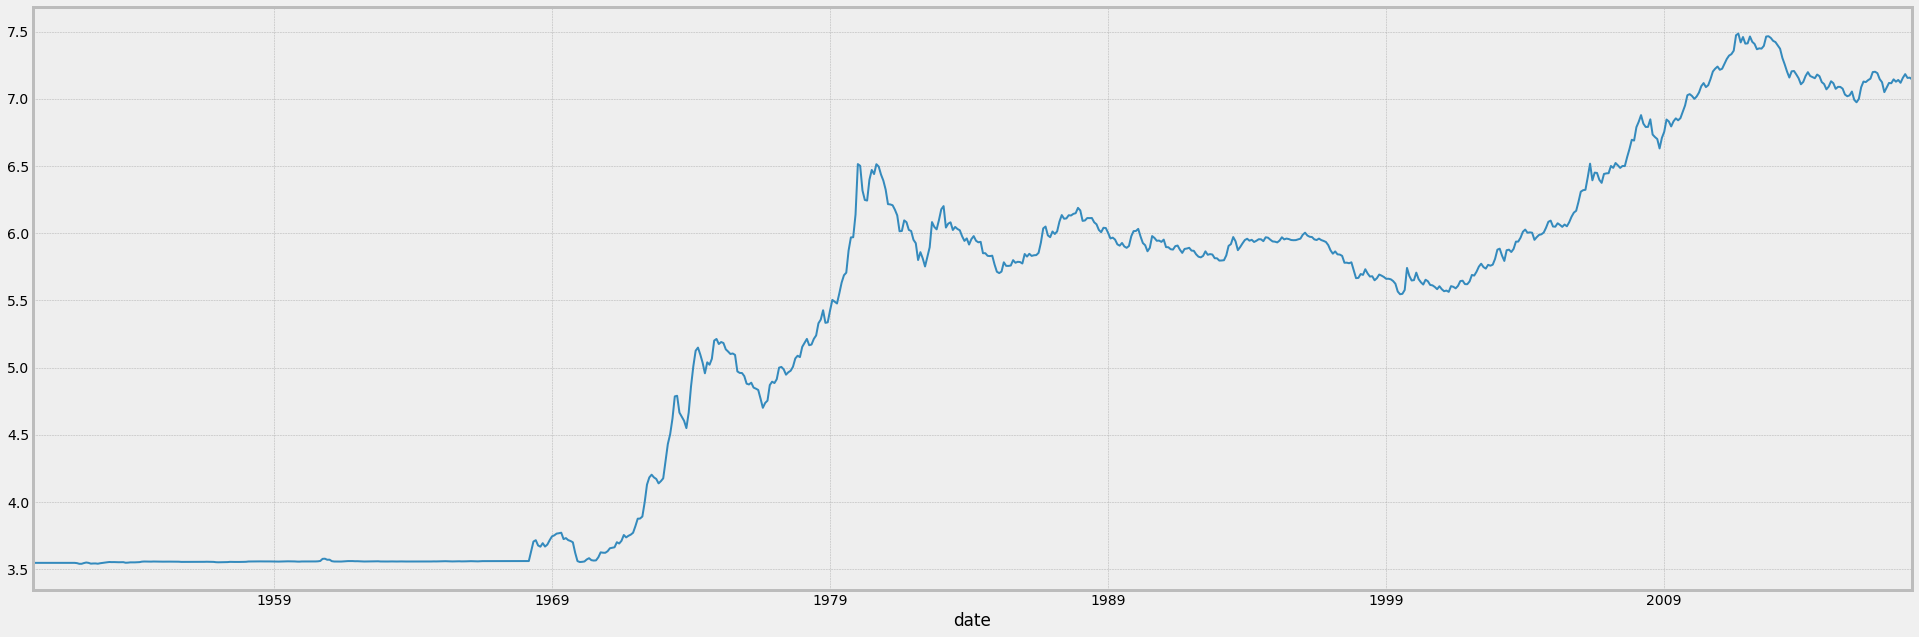

In [39]:
gold_prices['gold_prices_log'].plot()

In [40]:
gold_prices = pd.read_csv('gold_prices_monthly.csv')
gold_prices
gold_prices.drop(gold_prices.tail(2).index, inplace=True)
gold_prices['date'] = pd.to_datetime(gold_prices['date'])
gold_prices.set_index('date', inplace = True)
gold_prices.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [41]:
values = pd.DataFrame(gold_prices.values)
values

,0
0,34.730
1,34.730
2,34.730
3,34.730
4,34.730
...,...
811,1281.720
812,1317.045
813,1280.677
814,1283.189


In [42]:
dataframe = concat([values.shift(1), values], axis=1)
dataframe

,0,0
0,NaN,34.730
1,34.730,34.730
2,34.730,34.730
3,34.730,34.730
4,34.730,34.730
...,...,...
811,1235.100,1281.720
812,1281.720,1317.045
813,1317.045,1280.677
814,1280.677,1283.189


In [43]:
dataframe = concat([values.shift(1), values], axis=1)
dataframe

,0,0
0,NaN,34.730
1,34.730,34.730
2,34.730,34.730
3,34.730,34.730
4,34.730,34.730
...,...,...
811,1235.100,1281.720
812,1281.720,1317.045
813,1317.045,1280.677
814,1280.677,1283.189


In [44]:
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.998342
t+1  0.998342  1.000000


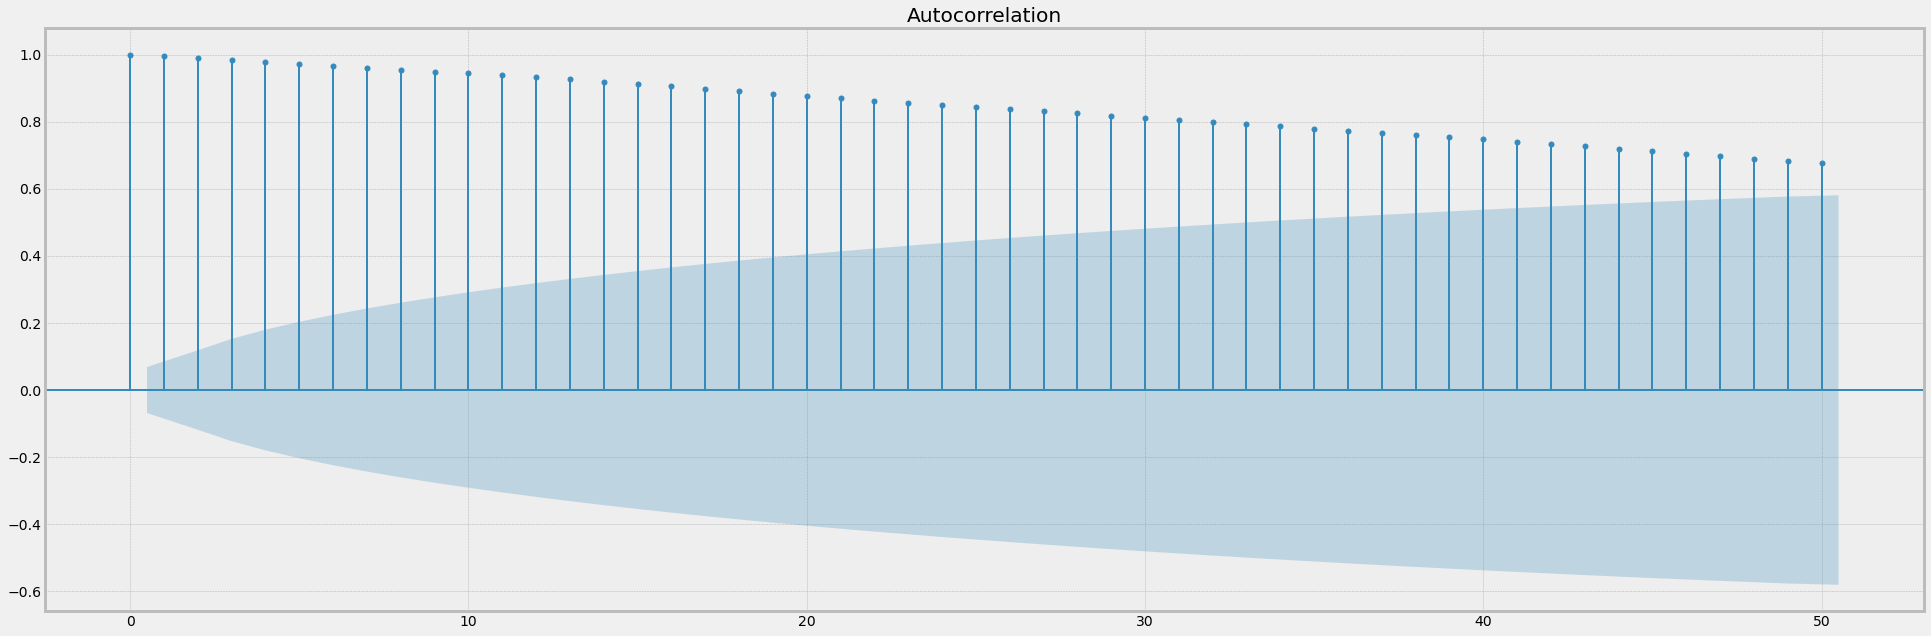

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(gold_prices, lags=50)
plot.show()

In [46]:
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod_AR = ARMA(gold_prices, order=(1,0))  # fit data to an AR1 model
res_AR = mod_AR.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res_AR.summary())

print(res_AR.params)

/Users/sharataylor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  816
Model:                     ARMA(1, 0)   Log Likelihood               -3754.959
Method:                       css-mle   S.D. of innovations             24.020
Date:                Wed, 26 Oct 2022   AIC                           7515.918
Time:                        21:27:40   BIC                           7530.031
Sample:                    01-01-1950   HQIC                          7521.334
                         - 12-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         572.2685    477.243      1.199      0.230    -363.111    1507.648
ar.L1.price     0.9991      0.001    925.808      0.000       0.997       1.001
                                    Roots       

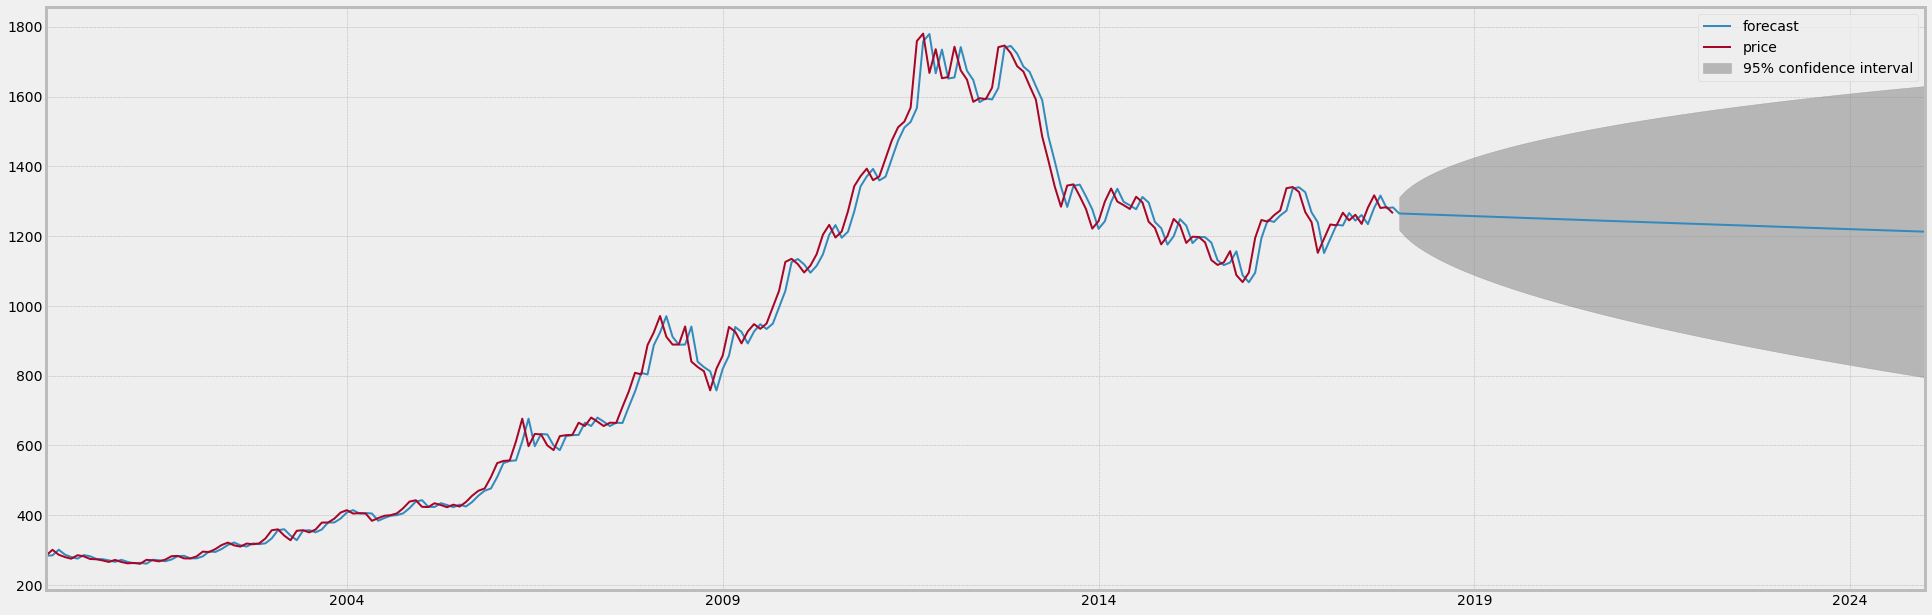

In [47]:
res_AR.plot_predict(start='2000', end='2025')
plot.show()

In [48]:
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod_MA = ARMA(gold_prices, order=(0,1))  # order is reversed for MA compared to AR, MA(1)
res_MA = mod_MA.fit()

# Print out summary information on the fit
print(res_MA.summary())

# Print out the estimate for the coefficients
print(res_MA.params)

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  816
Model:                     ARMA(0, 1)   Log Likelihood               -5532.775
Method:                       css-mle   S.D. of innovations            212.572
Date:                Wed, 26 Oct 2022   AIC                          11071.549
Time:                        21:27:40   BIC                          11085.663
Sample:                    01-01-1950   HQIC                         11076.966
                         - 12-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         379.1581     14.760     25.688      0.000     350.229     408.087
ma.L1.price     0.9847      0.005    180.433      0.000       0.974       0.995
                                    Roots       

/Users/sharataylor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


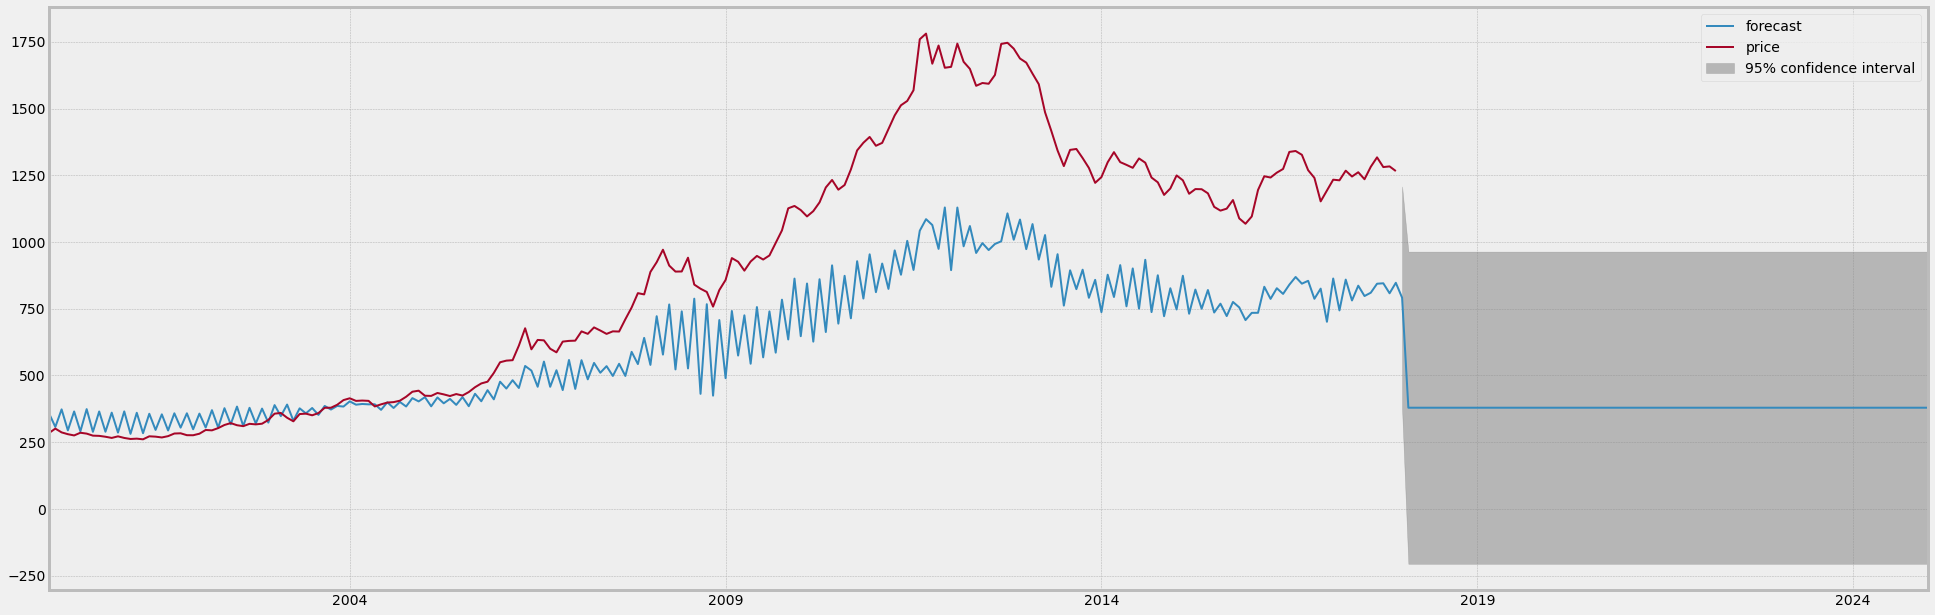

In [49]:
res_MA.plot_predict(start='2000', end='2025')
plot.show()

In [50]:
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod_ARMA = ARMA(gold_prices, order=(1,1))  # AR(1) and MA(1)
res_ARMA = mod_ARMA.fit()

# Print out summary information on the fit
print(res_ARMA.summary())

# Print out the estimate for the constant and for theta
print(res_ARMA.params)

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                  816
Model:                     ARMA(1, 1)   Log Likelihood               -3734.272
Method:                       css-mle   S.D. of innovations             23.418
Date:                Wed, 26 Oct 2022   AIC                           7476.543
Time:                        21:27:41   BIC                           7495.361
Sample:                    01-01-1950   HQIC                          7483.765
                         - 12-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         542.0716    424.091      1.278      0.201    -289.131    1373.274
ar.L1.price     0.9985      0.002    632.304      0.000       0.995       1.002
ma.L1.price     0.2473      0.037      6.630    

/Users/sharataylor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


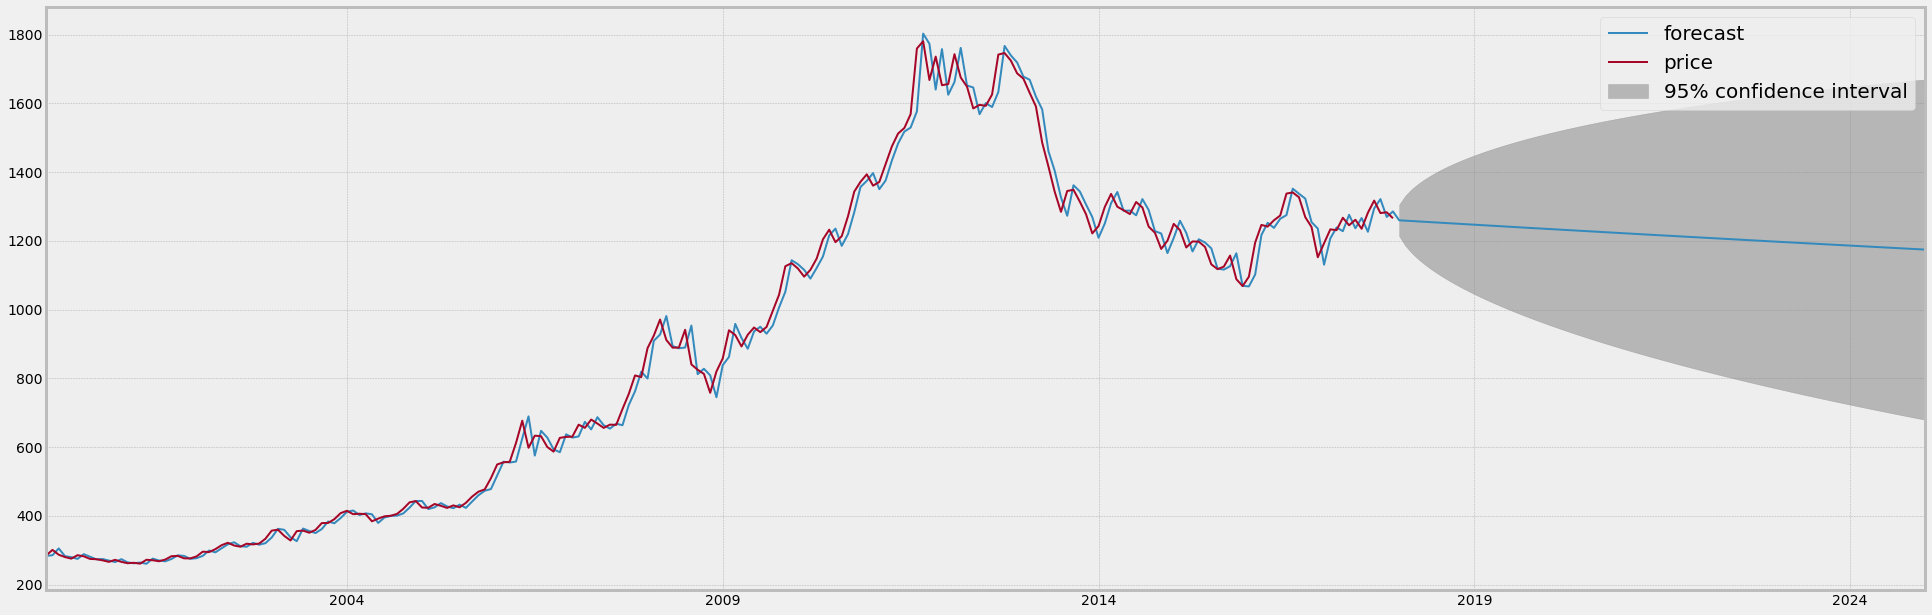

In [51]:
res_ARMA.plot_predict(start='2000',end='2025')
plot.legend(fontsize=20)
plot.show()

In [52]:
from statsmodels.tsa.arima_model import ARIMA

# Fit an MA(1) model to the first simulated data
mod_ARIMA = ARIMA(gold_prices, order=(1,1,1))  # AR(1) and MA(1)
res_ARIMA = mod_ARIMA.fit()

# Print out summary information on the fit
print(res_ARIMA.summary())

# Print out the estimate for the constant and for theta
print(res_ARIMA.params)

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  815
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3719.946
Method:                       css-mle   S.D. of innovations             23.227
Date:                Wed, 26 Oct 2022   AIC                           7447.891
Time:                        21:27:41   BIC                           7466.704
Sample:                    02-01-1950   HQIC                          7455.112
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5062      0.919      1.638      0.101      -0.296       3.308
ar.L1.D.price    -0.5893      0.090     -6.524      0.000      -0.766      -0.412
ma.L1.D.price     0.7959      0.070     

/Users/sharataylor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/sharataylor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


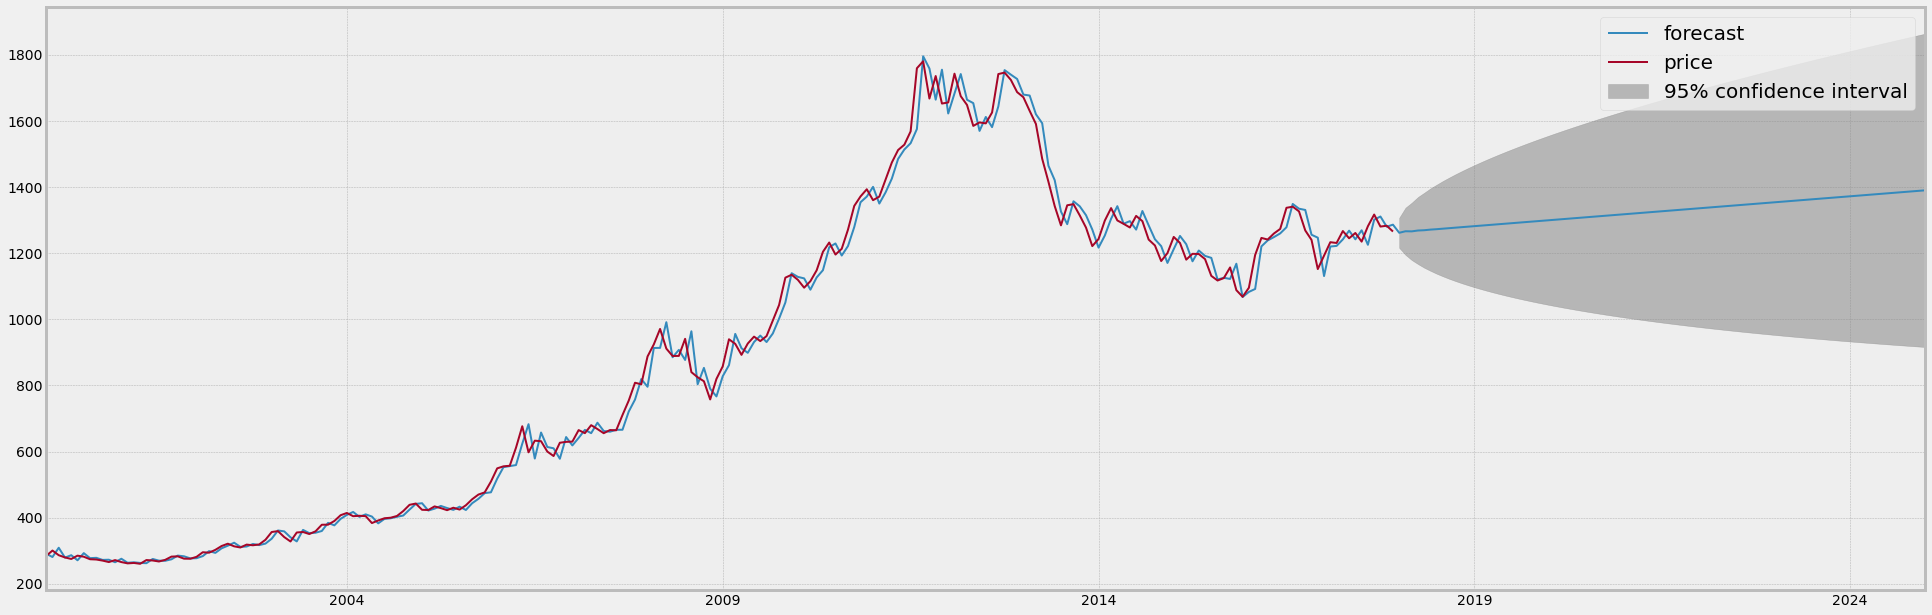

In [53]:
res_ARIMA.plot_predict(start='2000',end='2025')
plot.legend(fontsize=20)
plot.show()

In [54]:
m1 = gold_prices.loc['1950':'2017']
m1.values

array([[  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.72 ],
       [  34.72 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.72 ],
       [  34.71 ],
       [  34.71 ],
       [  34.71 ],
       [  34.73 ],
       [  34.66 ],
       [  34.49 ],
       [  34.49 ],
       [  34.68 ],
       [  34.82 ],
       [  34.73 ],
       [  34.53 ],
       [  34.57 ],
       [  34.58 ],
       [  34.51 ],
       [  34.63 ],
       [  34.72 ],
       [  34.79 ],
       [  34.88 ],
       [  34.95 ],
       [  34.92 ],
       [  34.93 ],
       [  34.9  ],
       [  34.89 ],
       [  34.91 ],
       [  34.91 ],
       [  34.76 ],
       [  34.79 ],
       [  34.86 ],
       [  34.85 ],
       [  34.86 ],
       [  34.88 ],
       [  34.92 ],
       [  35.04 ],
       [  35

In [55]:
rmse_ARMA = math.sqrt(mean_squared_error(m1.values, res_ARMA.predict(start='1950-01-01',end='2017-12-01')))
rmse_AR = math.sqrt(mean_squared_error(m1.values, res_AR.predict(start='1950-01-01',end='2017-12-01')))
rmse_MA = math.sqrt(mean_squared_error(m1.values, res_MA.predict(start='1950-01-01',end='2017-12-01')))
rmse_ARIMA = math.sqrt(mean_squared_error(m1.values, res_ARIMA.predict(start='1950',end='2018')))

In [56]:
print("Root mean squared error for AR model of order 1 is ",rmse_AR)
print("Root mean squared error for MA model of order 1 is ",rmse_MA)
print("Root mean squared error for ARMA model of order 1 is ",rmse_ARMA)
print("Root mean squared error for ARIMA model of order 1 is ",rmse_ARIMA)

Root mean squared error for AR model of order 1 is  30.502291202531385
Root mean squared error for MA model of order 1 is  212.997115388997
Root mean squared error for ARMA model of order 1 is  29.38079818079636
Root mean squared error for ARIMA model of order 1 is  561.9051789909289


In [57]:
# ADF Test
result = adfuller(gold_prices, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.3775391137039439
n_lags: 0.913781936339868
p-value: 0.913781936339868
Critical Values:
   1%, -3.4385095783477877
Critical Values:
   5%, -2.865141527500859
Critical Values:
   10%, -2.5686877783346946


In [58]:
gold_prices['first_diff'] = gold_prices['price'].diff()
gold_prices.head()

,price,first_diff
date,,
1950-01-01,34.73,NaN
1950-02-01,34.73,0.0
1950-03-01,34.73,0.0
1950-04-01,34.73,0.0
1950-05-01,34.73,0.0


In [59]:
gold_prices.dropna(inplace=True)

In [60]:
gold_prices.head()

,price,first_diff
date,,
1950-02-01,34.73,0.0
1950-03-01,34.73,0.0
1950-04-01,34.73,0.0
1950-05-01,34.73,0.0
1950-06-01,34.73,0.0


In [61]:
gold_prices_new = gold_prices.drop('price', axis= 1)

In [62]:
gold_prices_new.head()

,first_diff
date,
1950-02-01,0.0
1950-03-01,0.0
1950-04-01,0.0
1950-05-01,0.0
1950-06-01,0.0


In [63]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(gold_prices_new, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -6.997548945563386
n_lags: 7.46589105061951e-10
p-value: 7.46589105061951e-10
Critial Values:
   1%, -3.4385095783477877
Critial Values:
   5%, -2.865141527500859
Critial Values:
   10%, -2.5686877783346946


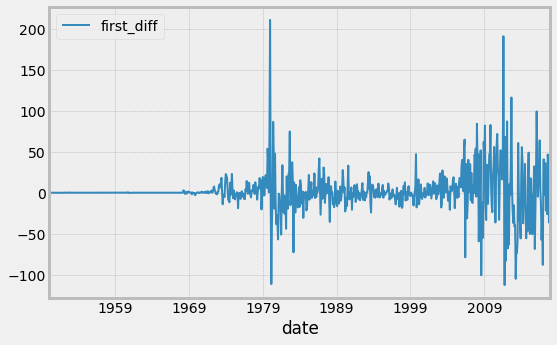

In [64]:
gold_prices_new.plot(figsize=(8,5))
plot.show()

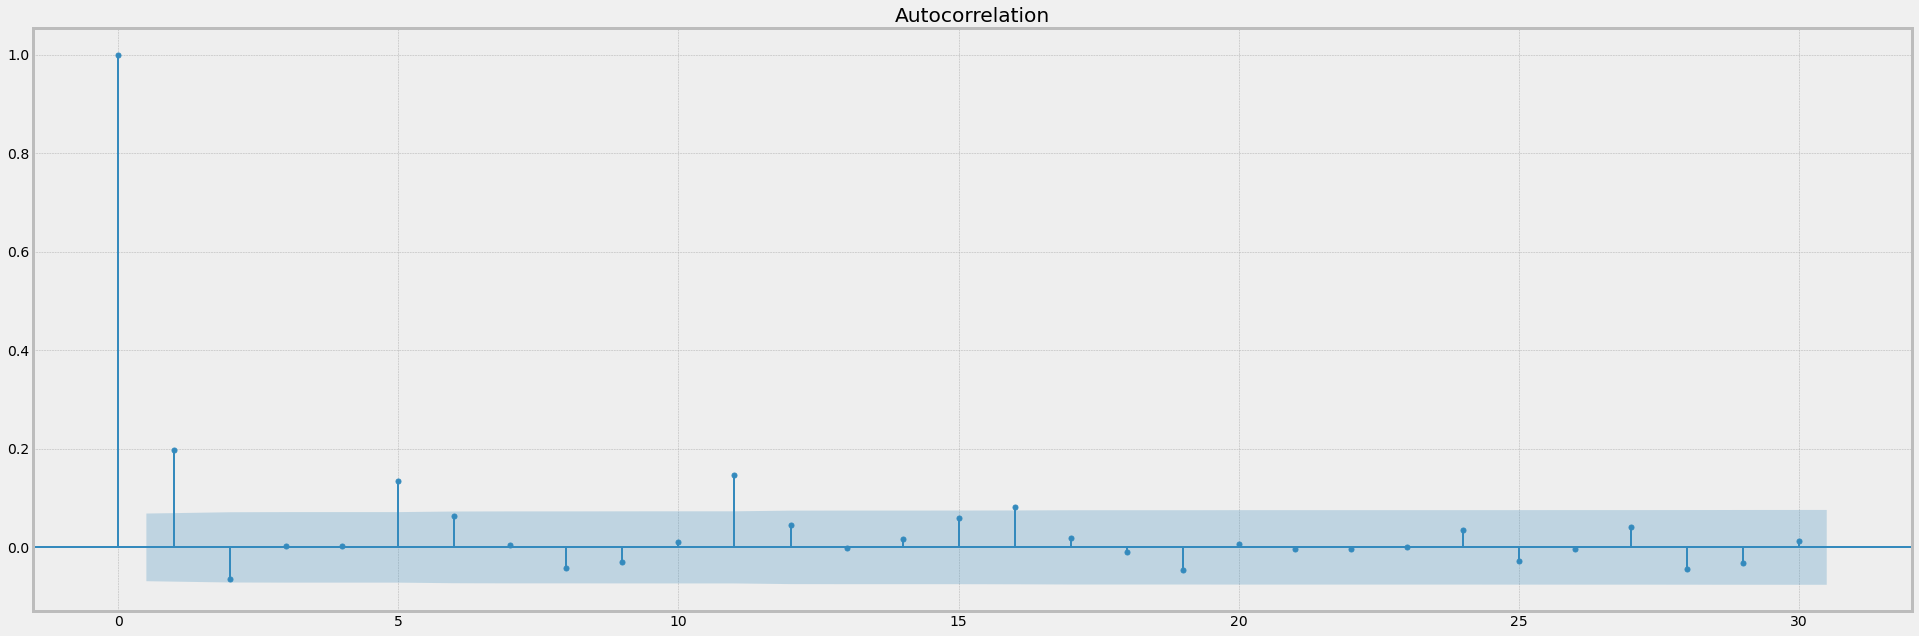

In [65]:
plot_acf(gold_prices_new)
plot.show()

In [66]:
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [67]:
for i in range(12,0,-1):
    df1[['t-'+str(i)]] = gold_prices_new.shift(i)
print(df1)

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
date                                                                         
1950-02-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1950-03-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1950-04-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1950-05-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1950-06-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-08-01   3.432 -14.243 -57.689 -28.636 -88.128  40.483  40.742  -2.327   
2017-09-01 -14.243 -57.689 -28.636 -88.128  40.483  40.742  -2.327  36.087   
2017-10-01 -57.689 -28.636 -88.128  40.483  40.742  -2.327  36.087 -21.900   
2017-11-01 -28.636 -88.128  40.483  40.742  -2.327  36.087 -21.900  16.027   
2017-12-01 -88.128  40.483  40.742  -2.327  36.087 -21.900  16.0

In [68]:
df1['t'] = gold_prices_new.values
print(df1.head(13))

            t-12  t-11  t-10  t-9  t-8  t-7  t-6  t-5  t-4  t-3   t-2   t-1  \
date                                                                          
1950-02-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   
1950-03-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  0.00   
1950-04-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.00  0.00   
1950-05-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.00  0.00   
1950-06-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.00  0.00   
1950-07-01   NaN   NaN   NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  0.00  0.00   
1950-08-01   NaN   NaN   NaN  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.00  0.00   
1950-09-01   NaN   NaN   NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.00  0.00   
1950-10-01   NaN   NaN   NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00   
1950-11-01   NaN   NaN   NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00   
1950-12-01   NaN   NaN   0.0  0.0  0.0  0.0  0.0  0.

In [69]:
df1_gold1 = df1[12:]
print(df1_gold1)

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
date                                                                         
1951-02-01   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
1951-03-01   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
1951-04-01   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
1951-05-01   0.000   0.000   0.000   0.000   0.000   0.000   0.000  -0.010   
1951-06-01   0.000   0.000   0.000   0.000   0.000   0.000  -0.010   0.000   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-08-01   3.432 -14.243 -57.689 -28.636 -88.128  40.483  40.742  -2.327   
2017-09-01 -14.243 -57.689 -28.636 -88.128  40.483  40.742  -2.327  36.087   
2017-10-01 -57.689 -28.636 -88.128  40.483  40.742  -2.327  36.087 -21.900   
2017-11-01 -28.636 -88.128  40.483  40.742  -2.327  36.087 -21.900  16.027   
2017-12-01 -88.128  40.483  40.742  -2.327  36.087 -21.900  16.0

In [70]:
df1_gold1.to_csv('gold_prices_lags_12months_features.csv', index=False)

In [71]:
df1 = pd.read_csv('gold_prices_lags_12months_features.csv', header=0)
df1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-0.01,0.00,0.01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-0.01,0.00,0.01,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,-0.01,0.00,0.01,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,0.00,0.01,0.00,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,0.00,0.01,0.00,0.00,0.00,0.00


In [72]:
gold = df1.values

In [73]:
X1= gold[:, 0:-1]

In [74]:
y1 = gold[:,-1]

In [75]:
X1

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
        -1.0000e-02,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -1.0000e-02,
         0.0000e+00,  1.0000e-02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-02,  0.0000e+00],
       ...,
       [-5.7689e+01, -2.8636e+01, -8.8128e+01, ..., -2.6177e+01,
         4.6620e+01,  3.5325e+01],
       [-2.8636e+01, -8.8128e+01,  4.0483e+01, ...,  4.6620e+01,
         3.5325e+01, -3.6368e+01],
       [-8.8128e+01,  4.0483e+01,  4.0742e+01, ...,  3.5325e+01,
        -3.6368e+01,  2.5120e+00]])

In [76]:
y1[0:10]

array([ 0.01,  0.  ,  0.  ,  0.  ,  0.  , -0.01, -0.01,  0.  ,  0.  ,
        0.02])

In [77]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.80)   # Set split
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 803
Training Observations for Target: 642
Testing Observations for Target: 161


In [78]:
trainfeature_size = int(len(X1) * 0.80)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 803
Training Observations for feature: 642
Testing Observations for feature: 161


In [79]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_gold = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
decision_tree_gold.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_gold.score(train_feature, train_target))
print(decision_tree_gold.score(test_feature,test_target))

1.0
-1.1774230786601723


In [80]:
for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_gold = DecisionTreeRegressor(max_depth=d)
    decision_tree_gold.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_gold.score(train_feature, train_target))
    print(decision_tree_gold.score(test_feature, test_target), '\n')  # You want the test score to be positive and high

max_depth= 2
0.3808549556289015
-0.4461319317588075 

max_depth= 3
0.4484122907809186
-1.4005942247215528 

max_depth= 4
0.48548532603310435
-1.5107823730272862 

max_depth= 5
0.5569147103836921
-0.9096836536031241 

max_depth= 7
0.6397507965195858
-1.2317188674401716 

max_depth= 8
0.705577709079547
-1.856947611247774 

max_depth= 10
0.769727095870735
-2.265362592519426 



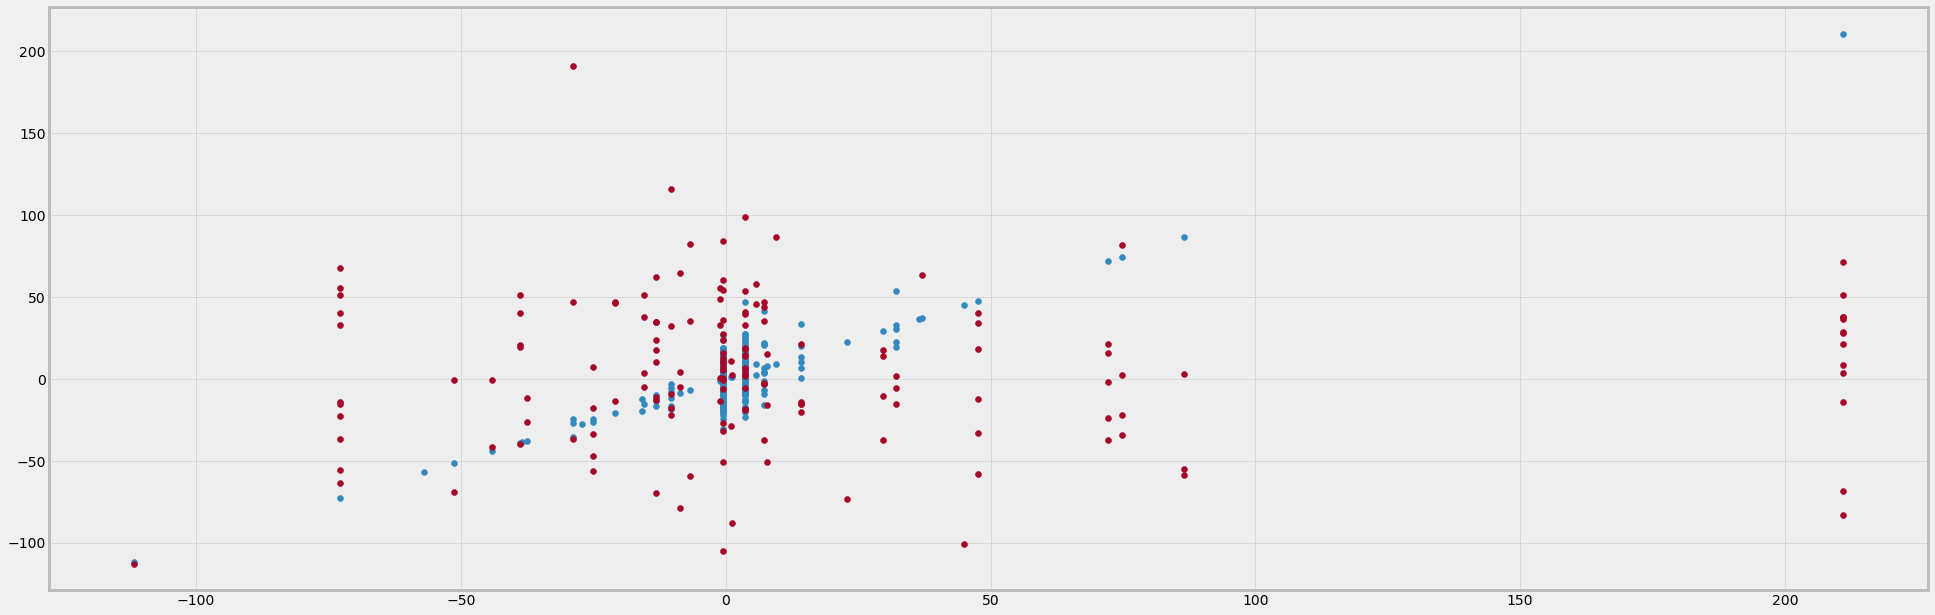

In [81]:
decision_tree_gold = DecisionTreeRegressor(max_depth=10)  # fill in best max depth here
decision_tree_gold.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_gold.predict(train_feature)
test_prediction = decision_tree_gold.predict(test_feature)

# Scatter the predictions vs actual values
plot.scatter(train_prediction, train_target, label='train')  # blue
plot.scatter(test_prediction, test_target, label='test')  # orange
plot.show()

In [82]:
# Feature Selection with Random Forest

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)  # n_estimators is the number of trees in forest
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.8191032050130567
-0.1660818649432776


In [83]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, 
# but also the longer it will take to compute. 
# max_features is the number of features chosen at random at splits
# max_depth is the number of splits
# random_state will make your result reproducible

# Run grid search
grid = {'n_estimators': [500], 'max_depth': [10],'max_features': [2], 'random_state': [17]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value

# The best test score

-0.03622526402734527 {'random_state': 17, 'n_estimators': 500, 'max_features': 2, 'max_depth': 10}


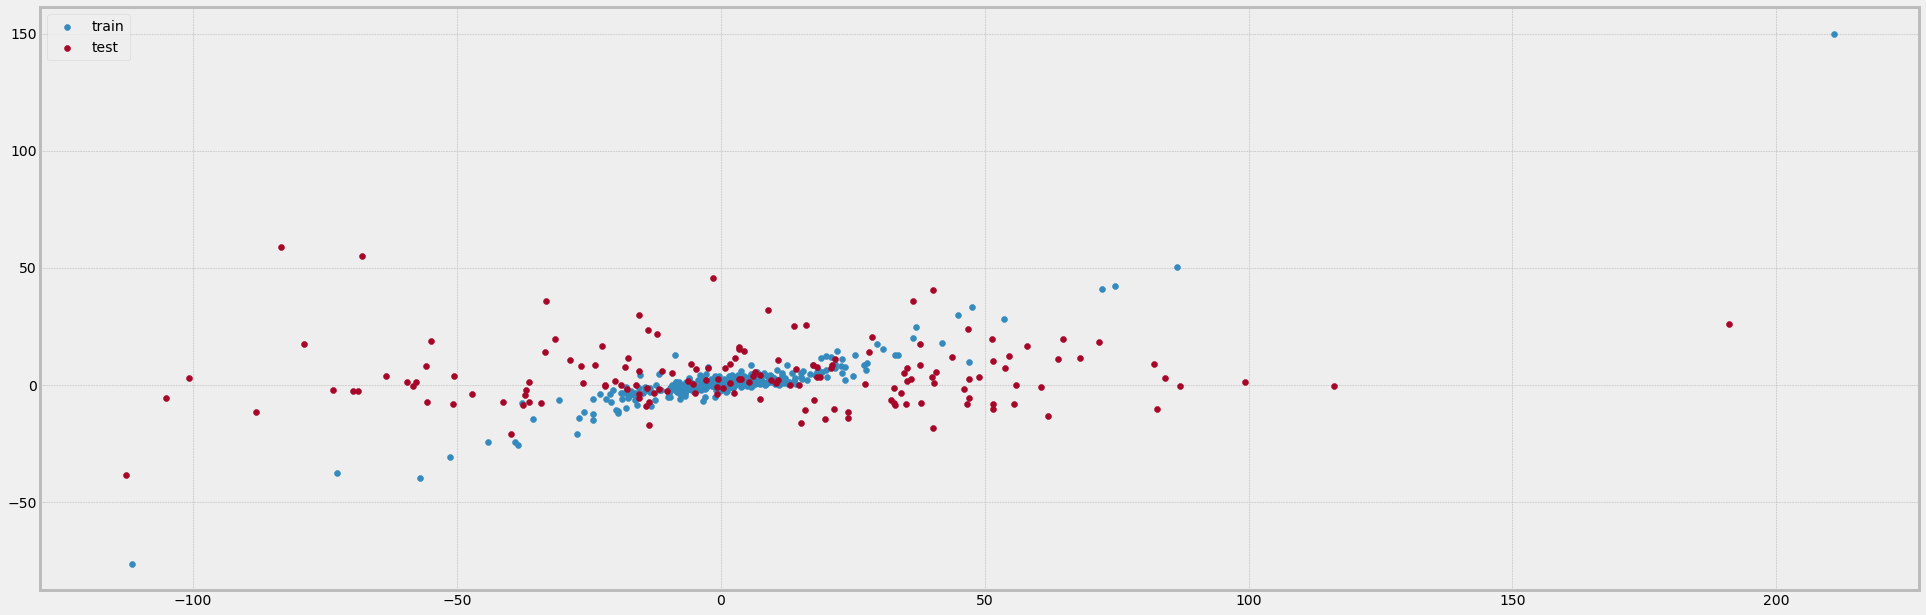

In [84]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=10, max_features=2, random_state=19)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plot.scatter(train_target, train_prediction, label='train')
plot.scatter(test_target, test_prediction, label='test')
plot.legend()
plot.show()

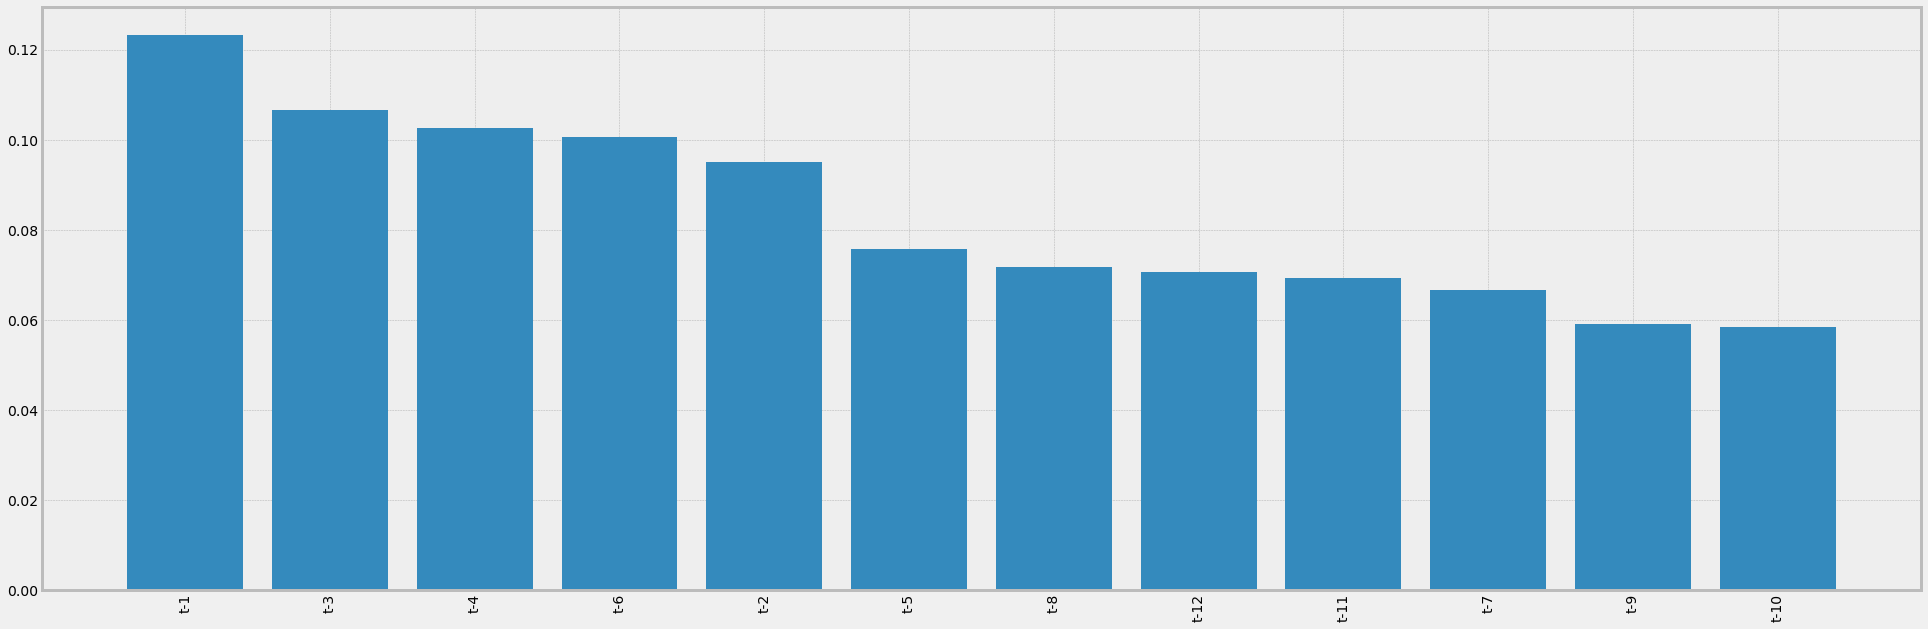

In [85]:
# Random Forest Model Feature Importance

# get column names
df1.columns

# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x1 = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plot.bar(x1, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plot.xticks(rotation=90)
plot.show()

In [86]:
# Gradient Boosted Regression Model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=2,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.7064254697417041
-0.09135003063977609


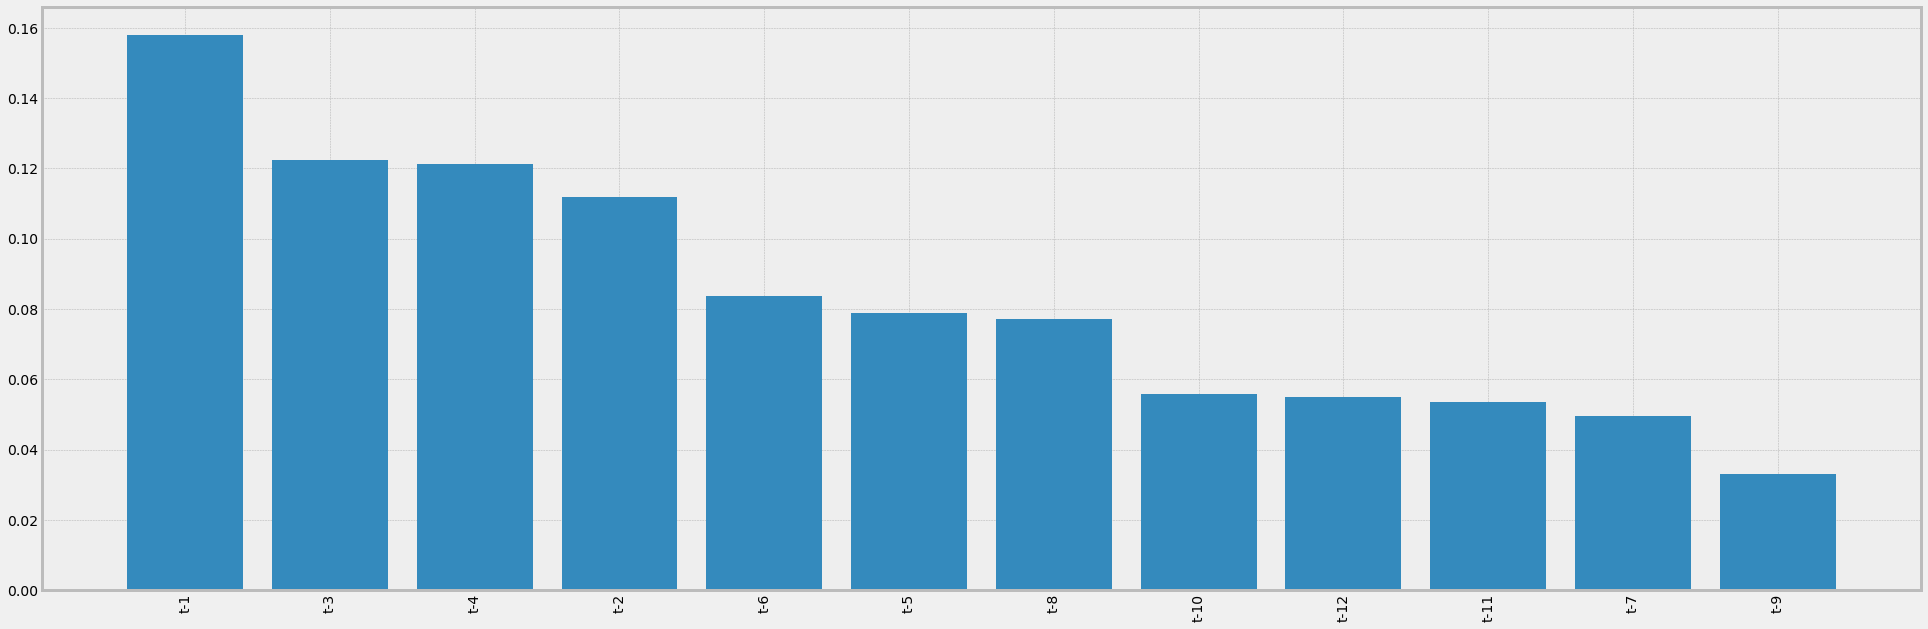

In [87]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x1 = range(X1.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x1, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()

In [88]:
from xgboost import XGBRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
xgbr = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

xgbr.fit(train_feature, train_target)

print(xgbr.score(train_feature, train_target))
print(xgbr.score(test_feature, test_target))

0.9998334131511892
-0.5300696079194382


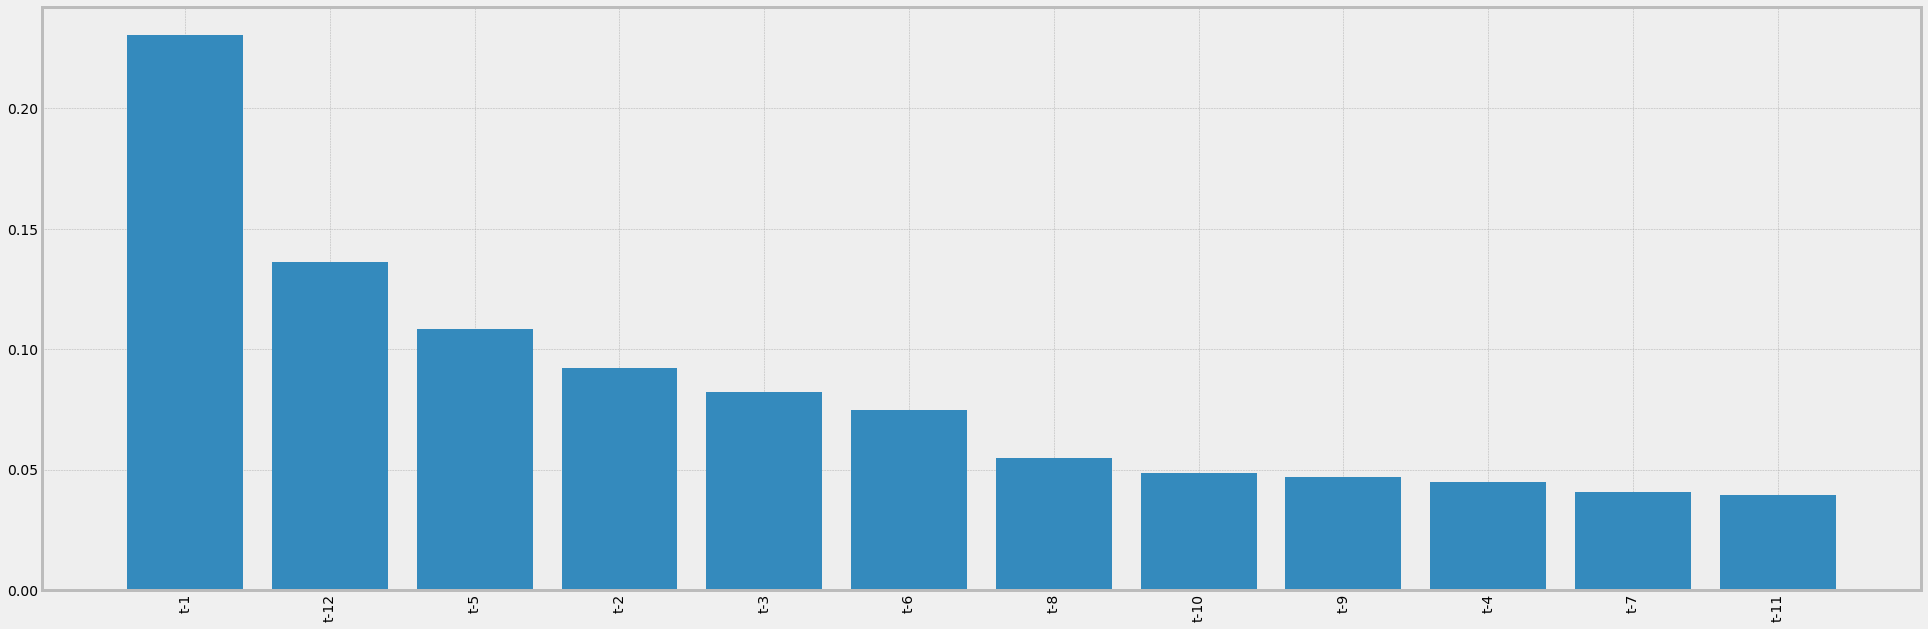

In [89]:
# Extreme Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted xgb model
feature_importances = xgbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x1 = range(X1.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x1, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()